# Chapter 4: Functional Programming: Rudimentary Statistics and Analytics

| New Concepts | Description |
| --- | --- |
| _return obj_ (from function) | Functions may return an object to be saved if a variable is defined by the function i.e., var1 = function(obj1, obj2, . . .)|

In [1]:
# def function_name(object1, object2, . . ., objectn):
   #  <operations>

### Total 

$\sum_{i=0}^{n-1} x_{i}$

In [2]:
n = 0
total = 0
values = [i for i in range(10)]

print("total\t","value")
for value in values:
    total += value
    print(total,"\t", value)

total	 value
0 	 0
1 	 1
3 	 2
6 	 3
10 	 4
15 	 5
21 	 6
28 	 7
36 	 8
45 	 9


In [3]:
# Don't keep copying and pasting old code...

In [4]:
def total(lst):
    total_ = 0
    # in original I used the index of the list
    # . . . 
    # n = len(lst)
    # for i in range(n)
    for val in lst:
        total_ += val
    return total_
total(values)

45

In [5]:
total([i for i in range(-1000,100000,53)])

94313645

In [6]:
import random
X1 = [3, 6, 9, 12, 15,18,21,24,27,30]
X2 = [random.randint(0,100) for i in range(10)]
total(X1), total(X2)

(165, 551)

### Mean

Let $X_1, X_2,...,X_n$ represent $n$ values from a random variables. For a given dataset, useful descriptive statistics of central tendency include mean, median, and mode, which we built as functions in a previous chapter. 

We define the mean of a set of numbers:
$\bar{X} = \frac{\sum_{i=0}^{n-1} x_{i}} {n}$

In [7]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_
mean(X1), mean(X2)

(16.5, 55.1)

Now let's build the rest of the summary statistical functions
1. median
2. mode
3. variance
4. standard deviation
5. standard error
6. covariance
7. correlation

### Median

In [8]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    
    # two cases: 
    # 1. list of odd length
    # i % j checks for remainder upon dividing i by j
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
     # 2. list of even length  
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        print(lst[lower_middle_index: upper_middle_index + 1])
        median_ = mean(lst[lower_middle_index: upper_middle_index + 1])
    return median_

print(X1)
median(X1), median(X2)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
[15, 18]
[54, 60]


(16.5, 57.0)

In [9]:
# transform X1 to be of odd length by removing the last index
# this is to test the first case int he median() function
median(X1[:-1])

15

In [10]:
sorted(X2)

[8, 24, 24, 25, 54, 60, 82, 86, 93, 95]

### Mode

In [11]:
def mode(lst):
    count_dct = {}
    # create entries for each value with 0
    for key in lst:
        count_dct[key] = 0
    # add up each occurence
    for key in lst:
        count_dct[key] += 1
    # calculate max_count up front
    max_count = max(count_dct.values())
    # now we can compare each count to the max count
    mode_ = []
    for key, count in count_dct.items():
        if count == max_count:
            mode_.append(key)
            # mode always returns as a list type
    
    return mode_

lst = [1,1,1,1,1,1,2,3,4,5,5,5,5,5,5,242]
mode(lst)

[1, 5]

In [12]:
if 1 == 2:
    print("run code")

In [13]:
if 1 == 1:
    print("run code")

run code


### Variance


$$ \sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$

When we are dealing with a sample, which is a subset of a population of observations, then we divide by $n - 1$, the **Degrees of Freedom**, to unbias the calculation. 

$$DoF = n - 1$$


$$ S^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$


In [14]:
# variance is the attempt to measure the spread of the data from the mean

In [15]:
def variance(lst, sample = True):
    list_mean = mean(lst)
    n = len(lst)
    DoF = n - 1
    sum_sq_diff = 0
    
    for val in lst:
        diff = val - list_mean
        sum_sq_diff += (diff) ** 2
        # print(val, list_mean, diff, sum_sq_diff)
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / DoF
    return variance_

        
variance(X1, sample = True), variance(X1, sample = False)

(82.5, 74.25)

In [16]:
variance(X2, sample = True), variance(X2, sample = False)

(1087.8777777777777, 979.0899999999999)

In [17]:
### SD = 

In [18]:
def SD(lst, sample = True):
    SD_ = variance(lst, sample) ** (1/2)
    return SD_
SD(X1, sample = True), SD(X1, sample = False)

(9.082951062292475, 8.616843969807043)

In [19]:
SD(X2, sample = True), SD(X2, sample = False)

(32.98299225021553, 31.290413867509006)

### Standard Error

In [20]:
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se

In [21]:
SD(X1, sample = True), STE(X1, sample = True)

(9.082951062292475, 2.872281323269014)

In [22]:
SD(X2, sample = True), STE(X2, sample = True)

(32.98299225021553, 10.430137955836335)

In [23]:
# longer the list the smaller the standard error

### Covariance

To calculate covariance, we multiply the sum of the product of the difference between the observed value and the mean of each list for value _i = 1_ through _n = number of observations_:

$cov_{pop}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n}$

We pass two lists through the covariance() function. As with the _variance()_ and _SD()_ functions, we can take the sample-covariance.

$cov_{sample}(x,y) = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})(y_{i} - y_{mean})} {n - 1}$

In [24]:
def covariance(lst1, lst2, sample = False):
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    
    cov = 0
    n1 = len(lst1)
    n2 = len(lst2)
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n):
            cov += (lst1[i] - mean1) * (lst2[i] - mean2)
            
        if sample == False: 
            cov = cov/n
        else: 
            cov = cov / (n - 1)
            
        return cov
    else: 
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    
covariance(X1, X2, sample = True)

33.16666666666666

In [25]:
covariance(X1[:-1], X2)

List lengths are not equal
List1: 9
List2: 10


$corr_{pop}(x,y) = \frac{cov_{pop}(x, y)} {\sigma_x \sigma_y}$

In [26]:
def correlation(lst1, lst2):
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    
    return corr
correlation(X1, X2)

0.09963852927506026

In [27]:
X3 = [1 + x * -0.5 for x in X1]
correlation(X1, X3)

-0.9

# $skew_{pop}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {n\sigma^3}$


$skew_{sample}(x,y) = \frac{\sum_{i=0}^{n-1}{(x_{i} - x_{mean})^3}} {(n-1)(n-2)\sigma^3}$

In [28]:
def skewness(lst, sample = True):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ ** 3) if not sample else\
        n * skew / ((n-1) * (n-1) * SD_ ** 3)
    return skew

skewness(X1)

0.0

In [29]:
skewness(X2)

-0.08557766274565788

$kurt_{pop} = \frac{\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {n\sigma^4}$

$kurt_{sample} = \frac{n(n+1)\sum_{i=0}^{n-1} (x_{i} - x_{mean})^4} {(n - 1)(n - 2)( n - 3)\sigma^4} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}$

In [30]:
def kurtosis(lst, sample = True):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for val in lst:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt    
    
kurtosis(X1, sample = False)

1.7757575757575759

In [31]:
kurtosis(X2, sample = False)

1.4235930731234896

### Gather Statistics

In [32]:
import pandas as pd
def gather_statistics(df, sample = False, round_dig = 3):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val.dropna(inplace = True)
        dct[key]["meam"] = round(mean(val), round_dig)
        dct[key]["median"] = round(median(val), round_dig)
        dct[key]["variance"] = round(variance(val), round_dig)
        dct[key]["S.D."] = round(SD(val, sample), round_dig)
        dct[key]["Skewness"] = round(skewness(val, sample), round_dig)
        dct[key]["Kurtosis"] = round(kurtosis(val, sample), round_dig)
    stats_df = pd.DataFrame(dct)
    return stats_df
    
data = pd.DataFrame([X1, X2], index = ["List1", "List2"])
gather_statistics(data, sample = False, round_dig = 2)

[3, 25]
[6, 86]
[9, 24]
[12, 60]
[15, 54]
[18, 82]
[21, 95]
[24, 24]


ZeroDivisionError: float division by zero

### Economic Freedom of the World

In [33]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename, header = [4],
                    index_col = [3,1])
data

Unnamed: 0 ISO Code 2      Countries  \
ISO Code 3 Year                                         
ALB        2020         NaN         AL        Albania   
DZA        2020         NaN         DZ        Algeria   
AGO        2020         NaN         AO         Angola   
ARG        2020         NaN         AR      Argentina   
ARM        2020         NaN         AM        Armenia   
...                     ...        ...            ...   
VEN        1970         NaN         VE  Venezuela, RB   
VNM        1970         NaN         VN        Vietnam   
YEM        1970         NaN         YE    Yemen, Rep.   
ZMB        1970         NaN         ZM         Zambia   
ZWE        1970         NaN         ZW       Zimbabwe   

                 Economic Freedom Summary Index   Rank  Quartile  \
ISO Code 3 Year                                                    
ALB        2020                            7.64   26.0       1.0   
DZA        2020                            5.12  157.0       4.0   
AGO        2020                            5.91  138.0       4.0   
ARG        2020                            4.87  161.0       4.0   
ARM        2020                            7.84   11.0       1.0   
...                                         ...    ...       ...   
VEN        1970                            7.19   13.0       1.0   
VNM        1970                             NaN    NaN       NaN   
YEM        1970                             NaN    NaN       NaN   
ZMB        1970                            5.33   54.0       3.0   
ZWE        1970                             NaN    NaN       NaN   

                 1A Government Consumption       data  \
ISO Code 3 Year                                         
ALB        2020                   8.026471  12.710000   
DZA        2020                   3.102941  29.450000   
AGO        2020                   7.700000  13.820000   
ARG        2020                   5.985294  19.650000   
ARM        2020                   6.605882  17.540000   
...                                    ...        ...   
VEN        1970                   6.602003  17.553191   
VNM        1970                        NaN        NaN   
YEM        1970                        NaN        NaN   
ZMB        1970                   3.448131  28.276353   
ZWE        1970                   7.806922  13.456464   

                 1B  Transfers and subsidies     data.1  ...  Unnamed: 101  \
ISO Code 3 Year                                          ...                 
ALB        2020                     6.978202  11.590000  ...       2011.00   
DZA        2020                     7.817129   8.511137  ...        153.00   
AGO        2020                     9.702997   1.590000  ...         38.25   
ARG        2020                     6.493188  13.370000  ...        114.75   
ARM        2020                     7.223433  10.690000  ...         76.50   
...                                      ...        ...  ...           ...   
VEN        1970                     9.827430   1.133333  ...           NaN   
VNM        1970                          NaN        NaN  ...           NaN   
YEM        1970                          NaN        NaN  ...           NaN   
ZMB        1970                     9.105430   3.783070  ...           NaN   
ZWE        1970                          NaN        NaN  ...           NaN   

                 Unnamed: 102  Unnamed: 103 Unnamed: 104  Unnamed: 105  \
ISO Code 3 Year                                                          
ALB        2020       2012.00       2013.00      2014.00       2015.00   
DZA        2020        153.00        157.00       159.00        159.00   
AGO        2020         38.25         39.25        39.75         39.75   
ARG        2020        114.75        117.75       119.25        119.25   
ARM        2020         76.50         78.50        79.50         79.50   
...                       ...           ...          ...           ...   
VEN        1970           NaN           N

In [34]:
file = pd.ExcelFile(filename)
file.sheet_names # see all sheet name
# import sheet names when an excel workbook has multiple sheets

for sheet_name in file.sheet_names:
    print(sheet_name)
    print(pd.read_excel(filename, header = [4],
                       index_col = [3,1],
                       sheet_name = sheet_name))

EFW Data 2022 Report
                 Unnamed: 0 ISO Code 2      Countries  \
ISO Code 3 Year                                         
ALB        2020         NaN         AL        Albania   
DZA        2020         NaN         DZ        Algeria   
AGO        2020         NaN         AO         Angola   
ARG        2020         NaN         AR      Argentina   
ARM        2020         NaN         AM        Armenia   
...                     ...        ...            ...   
VEN        1970         NaN         VE  Venezuela, RB   
VNM        1970         NaN         VN        Vietnam   
YEM        1970         NaN         YE    Yemen, Rep.   
ZMB        1970         NaN         ZM         Zambia   
ZWE        1970         NaN         ZW       Zimbabwe   

                 Economic Freedom Summary Index   Rank  Quartile  \
ISO Code 3 Year                                                    
ALB        2020                            7.64   26.0       1.0   
DZA        2020                  

In [35]:
data.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['Unnamed: 0', 'ISO Code 2', 'Countries',
        'Economic Freedom Summary Index', 'Rank', 'Quartile',
        '1A Government Consumption', 'data', '1B  Transfers and subsidies',
        'data.1',
        ...
        'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104',
        'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107', 'Unnamed: 108',
        'Unnamed: 109', 'Unnamed: 110'],
       dtype='object', length=109)
 Axis 1: MultiIndex([('ALB', 2020),
             ('DZA', 2020),
             ('AGO', 2020),
             ('ARG', 2020),
             ('ARM', 2020),
             ('AUS', 2020),
             ('AUT', 2020),
             ('AZE', 2020),
             ('BHS', 2020),
             ('BHR', 2020),
             ...
             ('UKR', 1970),
             ('ARE', 1970),
             ('GBR', 1970),
             ('USA', 1970),
             ('URY', 1970),
             ('VEN', 1970),
             ('VNM', 1970),
             (

In [36]:
dir(data)

['Countries',
 'Quartile',
 'Rank',
 'Region',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',


In [37]:
# draw the target sheet_name from the list of sheet_names
sheet_name = file.sheet_names[1]
data = pd.read_excel(filename,
                   sheet_name = sheet_name,
                    index_col = [2,0])
rename = {"Panel Data Summary Index":"Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade INternationally",
         "Area 5":"Regulation"}
data.rename(columns = rename, inplace = True)

data = data[data.keys()[4:-1]]
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
VEN        1970  7.242943            8.349529   
VNM        1970       NaN                 NaN   
YEM        1970       NaN                 NaN   
ZMB        1970  4.498763            5.374545   
ZWE        1970       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
VEN        1970                          5.003088     9.621851   
VNM        1970                               NaN          NaN   
YEM        1970                               NaN          NaN   
ZMB        1970                          4.472812     5.137395   
ZWE        1970                               NaN          NaN   

                 Freedom to Trade INternationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
VEN        1970                          7.895993    5.209592  
VNM        1970                               NaN         NaN  
YEM        1970                               NaN         NaN  
ZMB        1970                               NaN    5.307952  
ZWE        1970                               NaN         NaN  

[4455 rows x 6 columns]

### Seque on boolean series, calling subsets

In [38]:
income_levels = data.keys()[2]
data[income_levels]

ISO_Code_3  Year
ALB         2020    5.260351
DZA         2020    4.131760
AGO         2020    3.705161
ARG         2020    4.796454
ARM         2020    6.236215
                      ...   
VEN         1970    5.003088
VNM         1970         NaN
YEM         1970         NaN
ZMB         1970    4.472812
ZWE         1970         NaN
Name: Legal System and Property Rights, Length: 4455, dtype: float64

In [39]:
income_levels = data.keys()[2]
# access the unique values int he column by calling .unique()
data[income_levels].unique()
# know we can subdivide the dataset into different levels

array([5.2603512 , 4.13175981, 3.70516118, ..., 5.39763108, 5.00308839,
       4.47281169])

In [40]:
high_income_bool = data[income_levels] == "H" 
um_income_bool = data[income_levels] == "UM"
# finding all the countries with H and UM income levels
# "|" is the symbol for or
data[high_income_bool | um_income_bool]

Empty DataFrame
Columns: [Summary, Size of Government, Legal System and Property Rights, Sound Money, Freedom to Trade INternationally, Regulation]
Index: []

In [41]:
# choose only a subset of the columns, variables of interest


In [42]:
data.dropna()

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
TUN        1970  5.538385            4.946963   
TUR        1970  4.277887            5.183333   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   
VEN        1970  7.242943            8.349529   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
TUN        1970                          6.340170     6.885720   
TUR        1970                          4.764211     5.476488   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   
VEN        1970                          5.003088     9.621851   

                 Freedom to Trade INternationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
TUN        1970                          3.500622    6.225955  
TUR        1970                          0.246240    5.578751  
GBR        1970                          3.981406    7.489366  
USA        1970                          8.232334    6.631262  
VEN        1970                          7.895993    5.209592  

[3617 rows x 6 columns]

In [43]:
data.dropna(axis = 1, how = "any")

Empty DataFrame
Columns: []
Index: [(ALB, 2020), (DZA, 2020), (AGO, 2020), (ARG, 2020), (ARM, 2020), (AUS, 2020), (AUT, 2020), (AZE, 2020), (BHS, 2020), (BHR, 2020), (BGD, 2020), (BRB, 2020), (BLR, 2020), (BEL, 2020), (BLZ, 2020), (BEN, 2020), (BTN, 2020), (BOL, 2020), (BIH, 2020), (BWA, 2020), (BRA, 2020), (BRN, 2020), (BGR, 2020), (BFA, 2020), (BDI, 2020), (CPV, 2020), (KHM, 2020), (CMR, 2020), (CAN, 2020), (CAF, 2020), (TCD, 2020), (CHL, 2020), (CHN, 2020), (COL, 2020), (COM, 2020), (COD, 2020), (COG, 2020), (CRI, 2020), (CIV, 2020), (HRV, 2020), (CYP, 2020), (CZE, 2020), (DNK, 2020), (DJI, 2020), (DOM, 2020), (ECU, 2020), (EGY, 2020), (SLV, 2020), (EST, 2020), (SWZ, 2020), (ETH, 2020), (FJI, 2020), (FIN, 2020), (FRA, 2020), (GAB, 2020), (GMB, 2020), (GEO, 2020), (DEU, 2020), (GHA, 2020), (GRC, 2020), (GTM, 2020), (GIN, 2020), (GNB, 2020), (GUY, 2020), (HTI, 2020), (HND, 2020), (HKG, 2020), (HUN, 2020), (ISL, 2020), (IND, 2020), (IDN, 2020), (IRN, 2020), (IRQ, 2020), (IRL, 2020), (ISR, 2020), (ITA, 2020), (JAM, 2020), (JPN, 2020), (JOR, 2020), (KAZ, 2020), (KEN, 2020), (KOR, 2020), (KWT, 2020), (KGZ, 2020), (LAO, 2020), (LVA, 2020), (LBN, 2020), (LSO, 2020), (LBR, 2020), (LBY, 2020), (LTU, 2020), (LUX, 2020), (MDG, 2020), (MWI, 2020), (MYS, 2020), (MLI, 2020), (MLT, 2020), (MRT, 2020), (MUS, 2020), (MEX, 2020), ...]

[4455 rows x 0 columns]

In [44]:
data = data.dropna(how="all")
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   
URY        1970  5.663644            4.805746   
VEN        1970  7.242943            8.349529   
ZMB        1970  4.498763            5.374545   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   
URY        1970                          5.397631     5.480230   
VEN        1970                          5.003088     9.621851   
ZMB        1970                          4.472812     5.137395   

                 Freedom to Trade INternationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
GBR        1970                          3.981406    7.489366  
USA        1970                          8.232334    6.631262  
URY        1970                          6.554423         NaN  
VEN        1970                          7.895993    5.209592  
ZMB        1970                               NaN    5.307952  

[3740 rows x 6 columns]

In [45]:
data_for_stats = data.dropna(how="any")
data_for_stats

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
TUN        1970  5.538385            4.946963   
TUR        1970  4.277887            5.183333   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   
VEN        1970  7.242943            8.349529   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
TUN        1970                          6.340170     6.885720   
TUR        1970                          4.764211     5.476488   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   
VEN        1970                          5.003088     9.621851   

                 Freedom to Trade INternationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
TUN        1970                          3.500622    6.225955  
TUR        1970                          0.246240    5.578751  
GBR        1970                          3.981406    7.489366  
USA        1970                          8.232334    6.631262  
VEN        1970                          7.895993    5.209592  

[3617 rows x 6 columns]

In [46]:
stats_DF = gather_statistics(data_for_stats, sample = False)
stats_DF

C:\Users\adamp\AppData\Local\Temp\ipykernel_21020\3108553380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val.dropna(inplace = True)


Summary  Size of Government  Legal System and Property Rights  \
meam        6.635               6.609                             5.282   
median      6.763               6.650                             5.098   
variance    1.274               1.466                             2.816   
S.D.        1.128               1.211                             1.678   
Skewness   -0.597              -0.136                             0.350   
Kurtosis    3.176               2.599                             2.404   

          Sound Money  Freedom to Trade INternationally  Regulation  
meam            7.813                             6.757       6.733  
median          8.154                             7.013       6.867  
variance        3.110                             2.874       1.448  
S.D.            1.763                             1.695       1.203  
Skewness       -1.312                            -0.984      -0.551  
Kurtosis        5.412                             4.200       3.145

In [47]:
cov_DF = data_for_stats.cov().round(2)
cov_DF

Summary  Size of Government  \
Summary                              1.27                0.42   
Size of Government                   0.42                1.47   
Legal System and Property Rights     1.45               -0.25   
Sound Money                          1.67                0.30   
Freedom to Trade INternationally     1.68                0.31   
Regulation                           1.13                0.25   

                                  Legal System and Property Rights  \
Summary                                                       1.45   
Size of Government                                           -0.25   
Legal System and Property Rights                              2.82   
Sound Money                                                   1.55   
Freedom to Trade INternationally                              1.80   
Regulation                                                    1.31   

                                  Sound Money  \
Summary                                  1.67   
Size of Government                       0.30   
Legal System and Property Rights         1.55   
Sound Money                              3.11   
Freedom to Trade INternationally         2.07   
Regulation                               1.28   

                                  Freedom to Trade INternationally  Regulation  
Summary                                                       1.68        1.13  
Size of Government                                            0.31        0.25  
Legal System and Property Rights                              1.80        1.31  
Sound Money                                                   2.07        1.28  
Freedom to Trade INternationally                              2.87        1.33  
Regulation                                                    1.33        1.45

In [48]:
corr_DF = data_for_stats.corr().round(2)
corr_DF

Summary  Size of Government  \
Summary                              1.00                0.31   
Size of Government                   0.31                1.00   
Legal System and Property Rights     0.76               -0.12   
Sound Money                          0.84                0.14   
Freedom to Trade INternationally     0.88                0.15   
Regulation                           0.83                0.17   

                                  Legal System and Property Rights  \
Summary                                                       0.76   
Size of Government                                           -0.12   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.52   
Freedom to Trade INternationally                              0.63   
Regulation                                                    0.65   

                                  Sound Money  \
Summary                                  0.84   
Size of Government                       0.14   
Legal System and Property Rights         0.52   
Sound Money                              1.00   
Freedom to Trade INternationally         0.69   
Regulation                               0.60   

                                  Freedom to Trade INternationally  Regulation  
Summary                                                       0.88        0.83  
Size of Government                                            0.15        0.17  
Legal System and Property Rights                              0.63        0.65  
Sound Money                                                   0.69        0.60  
Freedom to Trade INternationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [49]:
# alphabetize columns
data_for_stats.corr().round(2).sort_index(axis = 1)

Freedom to Trade INternationally  \
Summary                                                       0.88   
Size of Government                                            0.15   
Legal System and Property Rights                              0.63   
Sound Money                                                   0.69   
Freedom to Trade INternationally                              1.00   
Regulation                                                    0.65   

                                  Legal System and Property Rights  \
Summary                                                       0.76   
Size of Government                                           -0.12   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.52   
Freedom to Trade INternationally                              0.63   
Regulation                                                    0.65   

                                  Regulation  Size of Government  Sound Money  \
Summary                                 0.83                0.31         0.84   
Size of Government                      0.17                1.00         0.14   
Legal System and Property Rights        0.65               -0.12         0.52   
Sound Money                             0.60                0.14         1.00   
Freedom to Trade INternationally        0.65                0.15         0.69   
Regulation                              1.00                0.17         0.60   

                                  Summary  
Summary                              1.00  
Size of Government                   0.31  
Legal System and Property Rights     0.76  
Sound Money                          0.84  
Freedom to Trade INternationally     0.88  
Regulation                           0.83

Project 5 Plots already exists


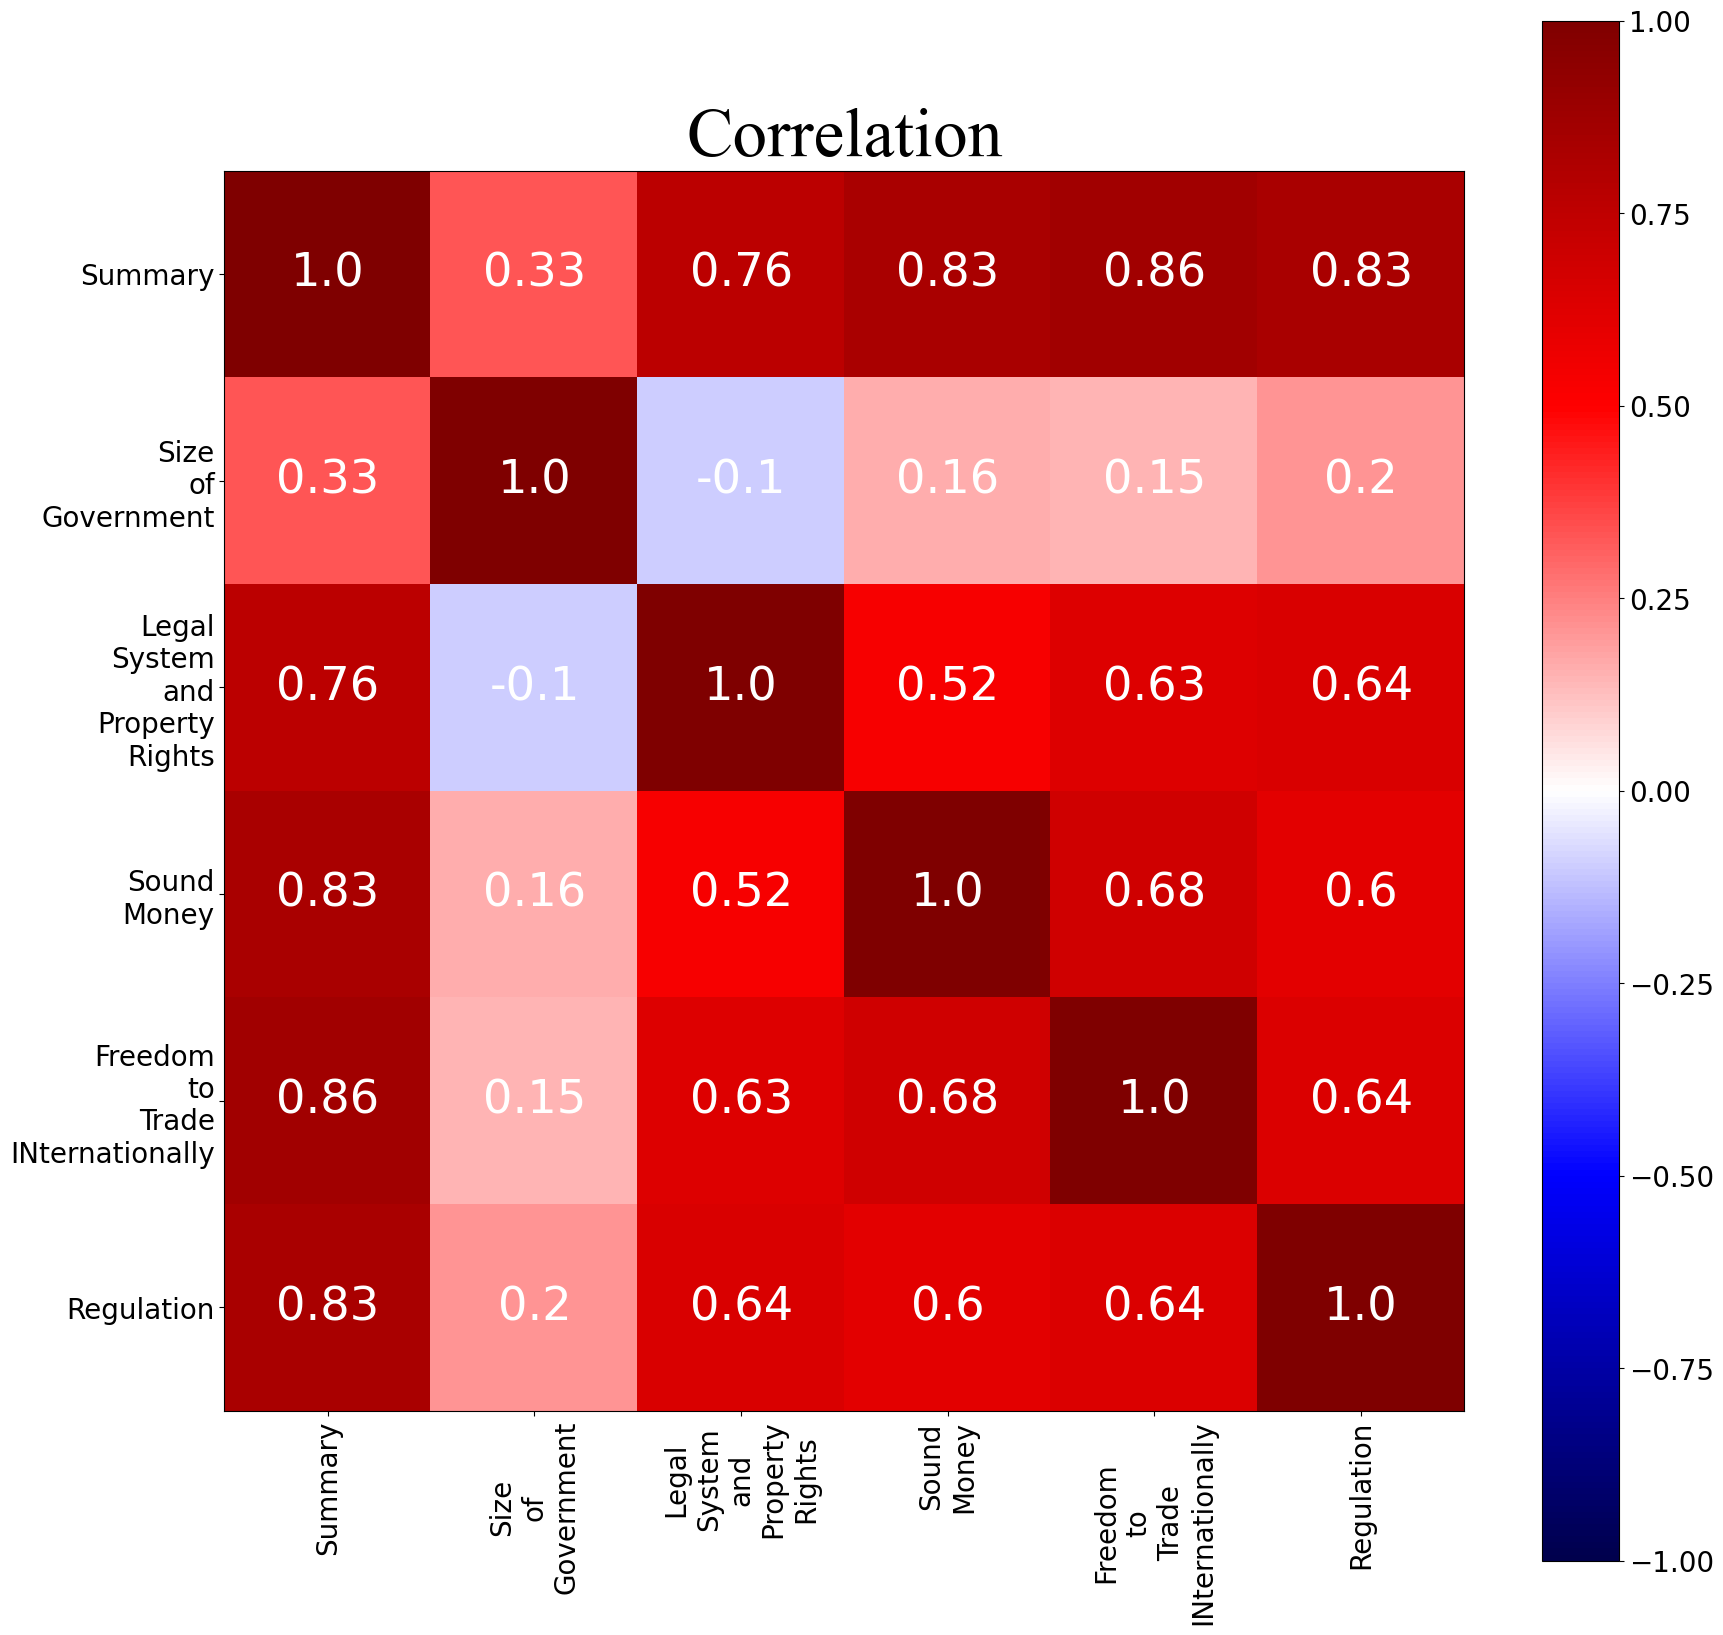

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

def corr_matrix_heatmap(data, dim = 20, pp = None):
    fig, ax = plt.subplots(figsize = (dim,dim))
    # Dividing the square into k columns and k rows
    # First, use a data type to allow the program to divdie the square
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ","\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    # put all of the options chosen above to use and create the correlation figure
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    
             # print(i, labels[i], j, labels[j], data.values[i][j])
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()
    
# create a folder on the fly to save jpeg files of figures
folder = "Project 5 Plots"
try:
    os.mkdir(folder)
except:
    print(folder, "already exists")
    
# create PDF
pp = PdfPages(folder + "/Economic Freedom Plots.pdf")


corr_data = data.corr()
corr_matrix_heatmap(corr_data, pp = pp)

### Building scatter plots with time as horizontal axis

In [51]:
mean_data = data.groupby("Year").mean()
mean_data

Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  5.699777            6.115453                          4.828106   
1975  5.330897            5.638449                          4.704443   
1980  5.358043            5.474844                          4.790720   
1985  5.423119            5.477523                          4.872785   
1990  5.716292            6.061804                          4.964320   
1995  6.163039            6.497296                          5.199571   
2000  6.592760            6.628378                          5.231726   
2001  6.599041            6.668608                          5.196628   
2002  6.663490            6.662246                          5.185988   
2003  6.681009            6.672367                          5.166744   
2004  6.710922            6.725984                          5.166447   
2005  6.736056            6.854917                          5.293075   
2006  6.780060            6.846312                          5.352180   
2007  6.810935            6.899178                          5.387801   
2008  6.769782            6.852975                          5.374990   
2009  6.774924            6.681671                          5.367239   
2010  6.809513            6.650865                          5.292711   
2011  6.812160            6.713350                          5.295417   
2012  6.823437            6.716821                          5.287927   
2013  6.820710            6.693263                          5.263555   
2014  6.869996            6.679071                          5.311640   
2015  6.868486            6.685504                          5.344179   
2016  6.872591            6.745947                          5.310897   
2017  6.840911            6.714026                          5.323041   
2018  6.888338            6.748693                          5.331769   
2019  6.893302            6.768514                          5.312195   
2020  6.749758            6.603613                          5.360975   

      Sound Money  Freedom to Trade INternationally  Regulation  
Year                                                             
1970     7.219435                          5.142756    5.643092  
1975     6.007796                          4.904180    5.600009  
1980     6.094311                          4.946113    5.661589  
1985     6.261684                          4.982920    5.687262  
1990     6.302771                          5.617330    5.816249  
1995     6.481726                          6.832335    6.085262  
2000     7.598053                          6.984603    6.559508  
2001     7.770338                          6.982832    6.394464  
2002     7.861788                          6.997352    6.621917  
2003     7.880149                          7.047378    6.649483  
2004     7.951051                          6.992921    6.722156  
2005     7.864794                          6.883771    6.782237  
2006     7.894100                          6.940902    6.864784  
2007     7.922043                          6.981182    6.866936  
2008     7.764033                          7.023490    6.834730  
2009     7.930318                          7.020073    6.878410  
2010     8.037720                          7.032564    7.021393  
2011     8.018281                          7.021954    7.037927  
2012     8.111376                          6.986931    7.030441  
2013     8.194170                          6.965516    6.994317  
2014     8.286492                          7.050601    7.018232  
2015     8.277932                          7.024002    7.006872  
2016     8.315198                          7.002284    6.986641  
2017     8.280965                          6.994231    6.892610  
2018     8.345674                          7.012747    7.005562  
2019     8.328343                          7.030791    7.029122  
2020     8.242351                          6.615388    6.927039

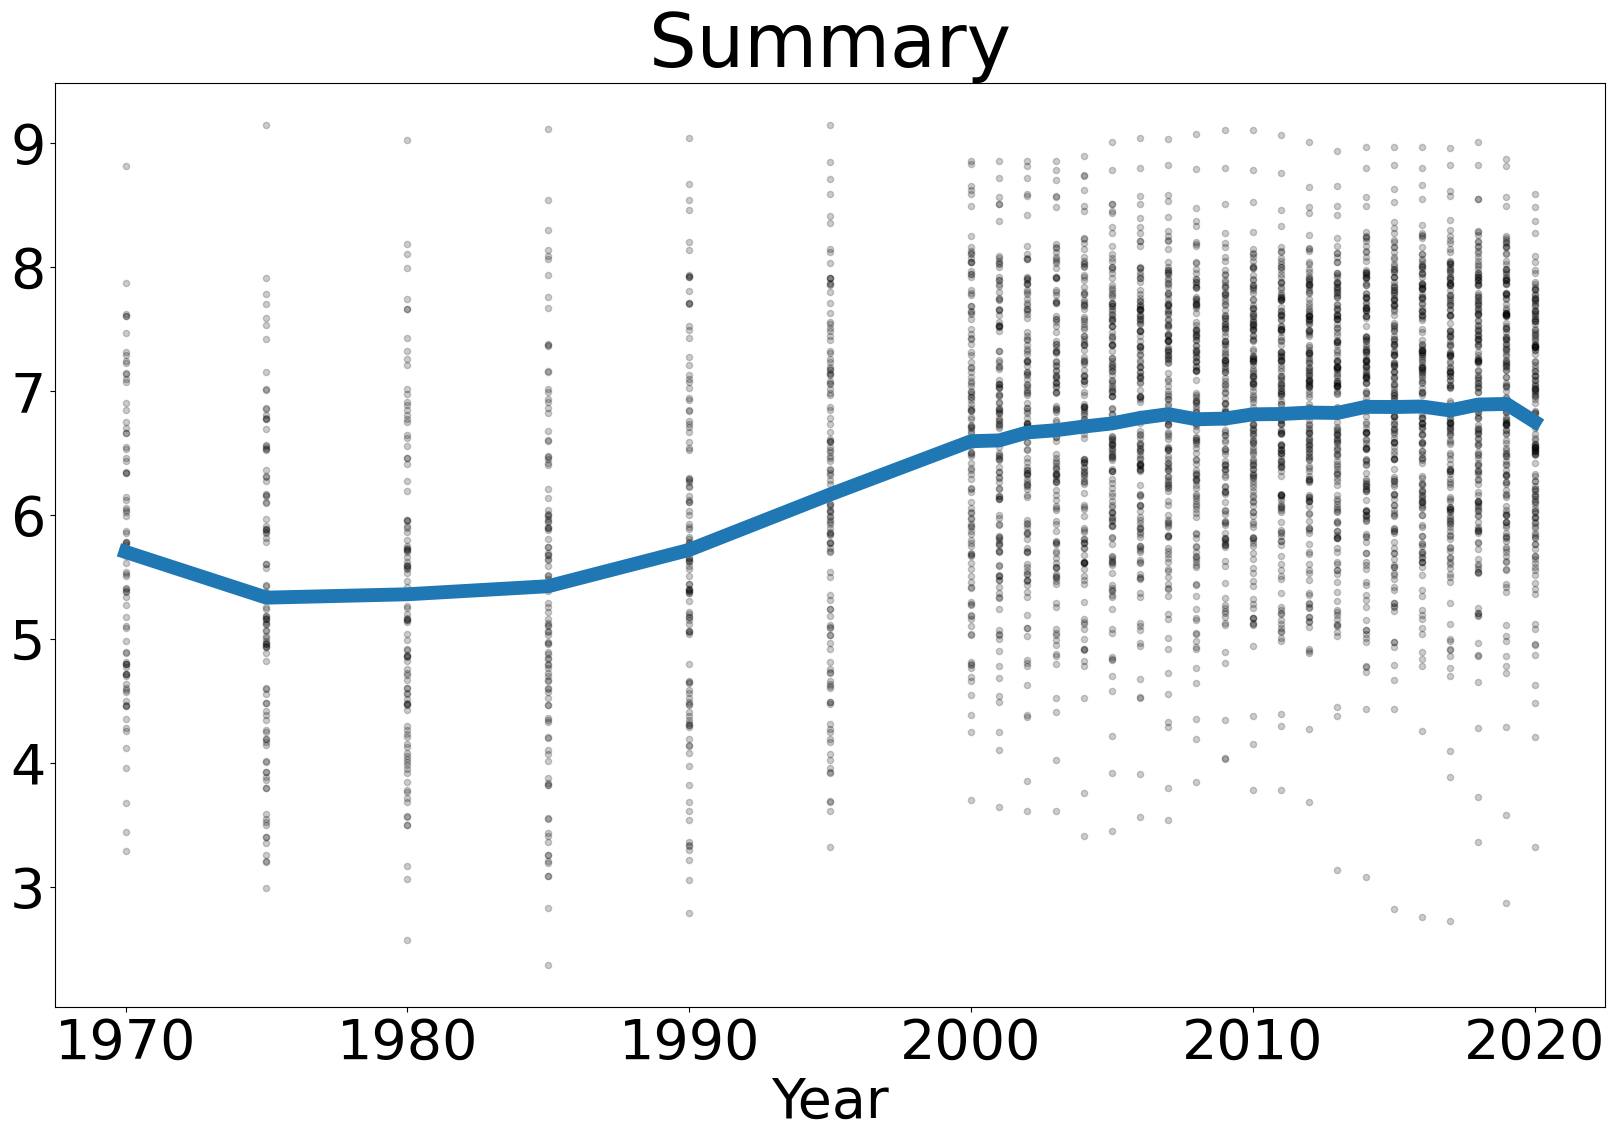

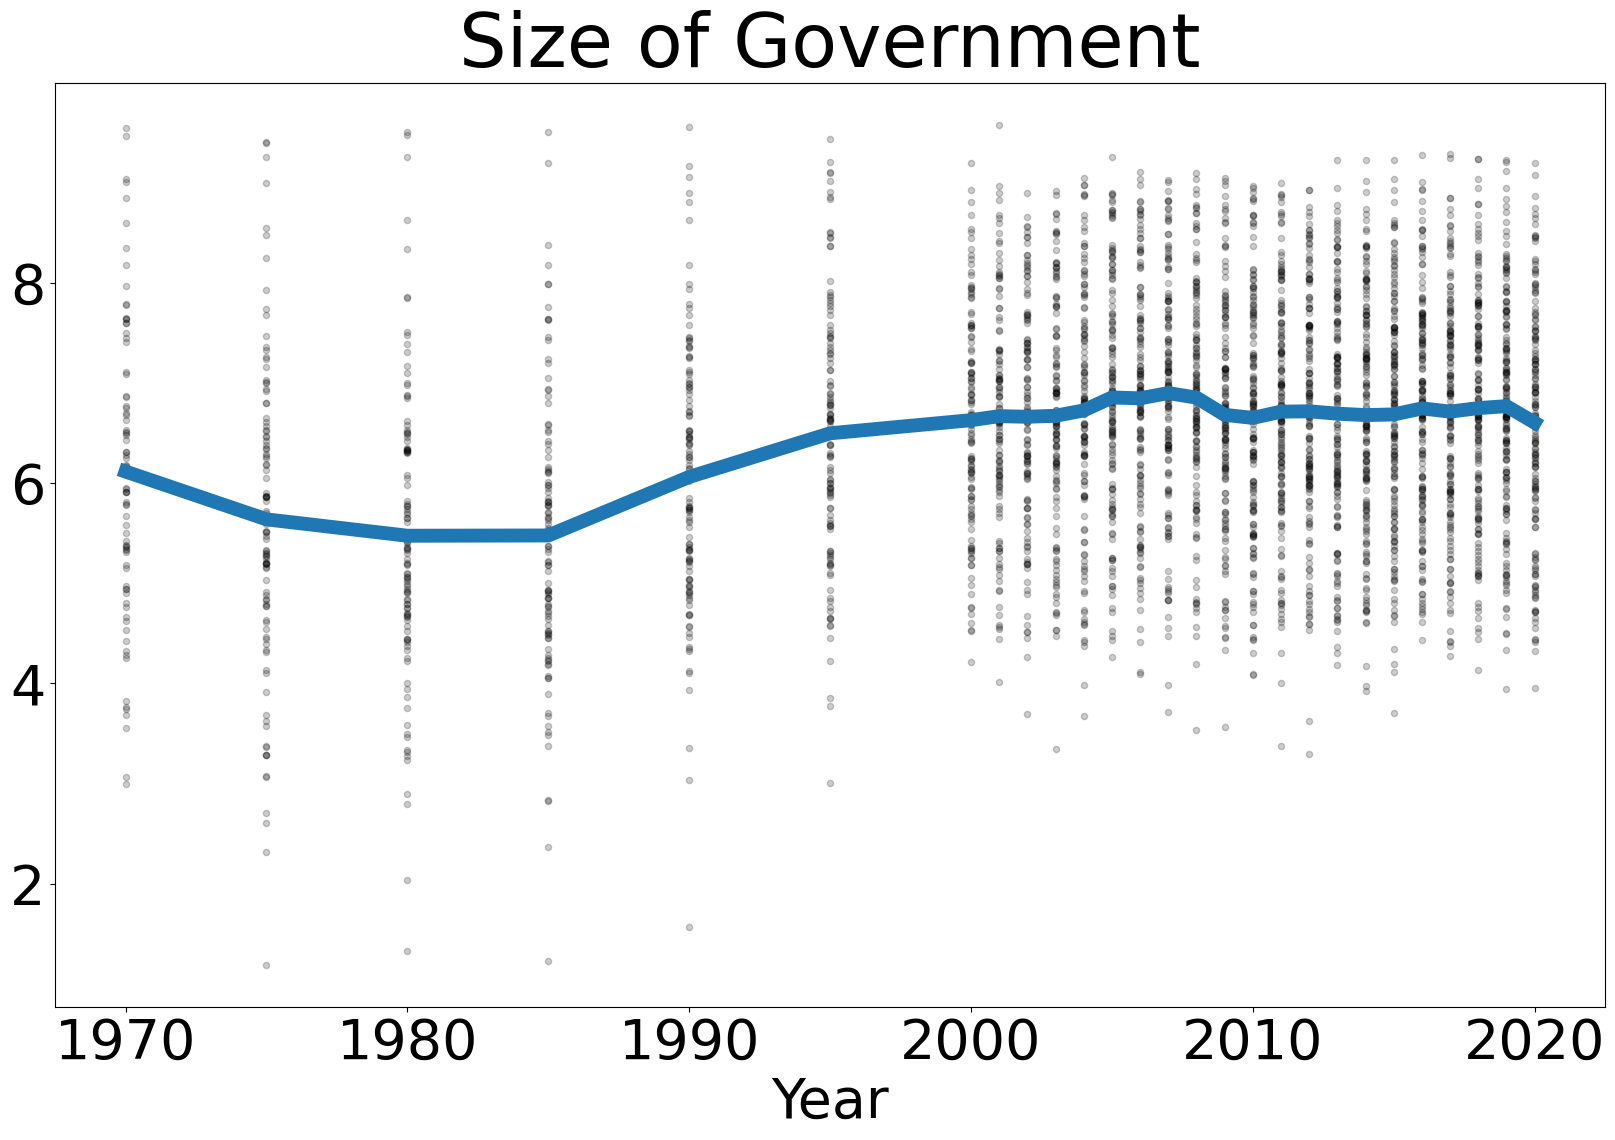

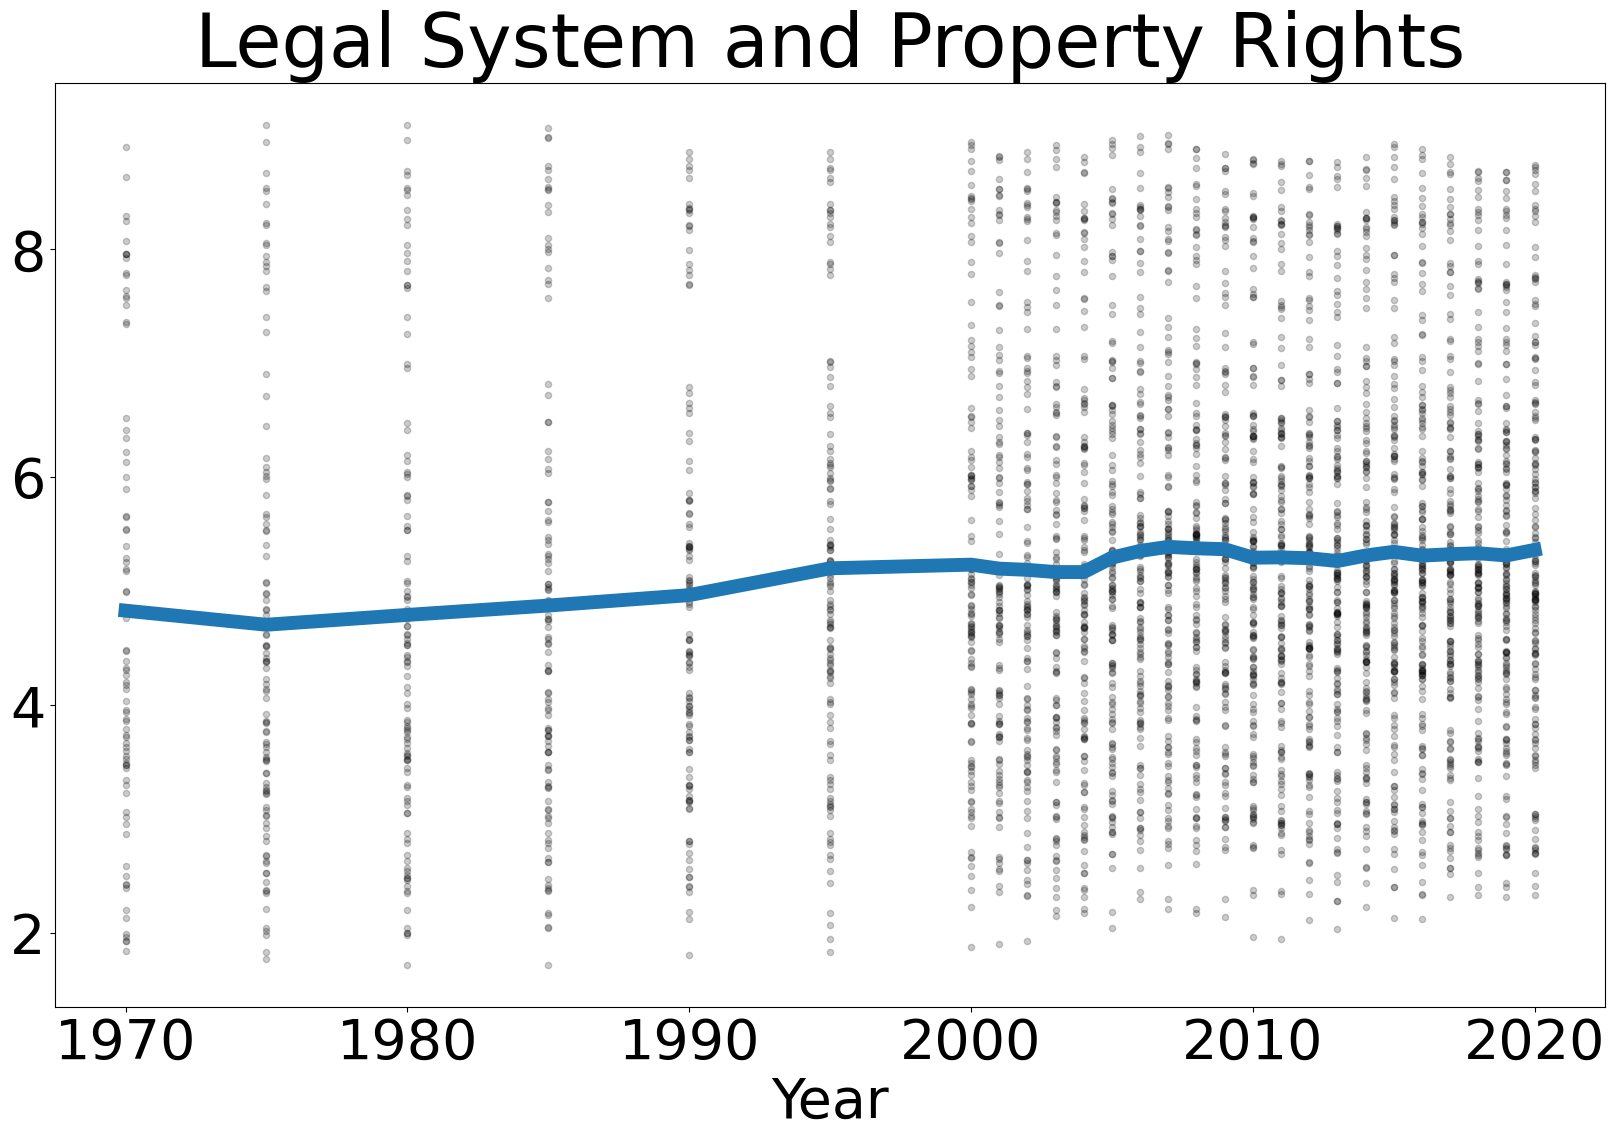

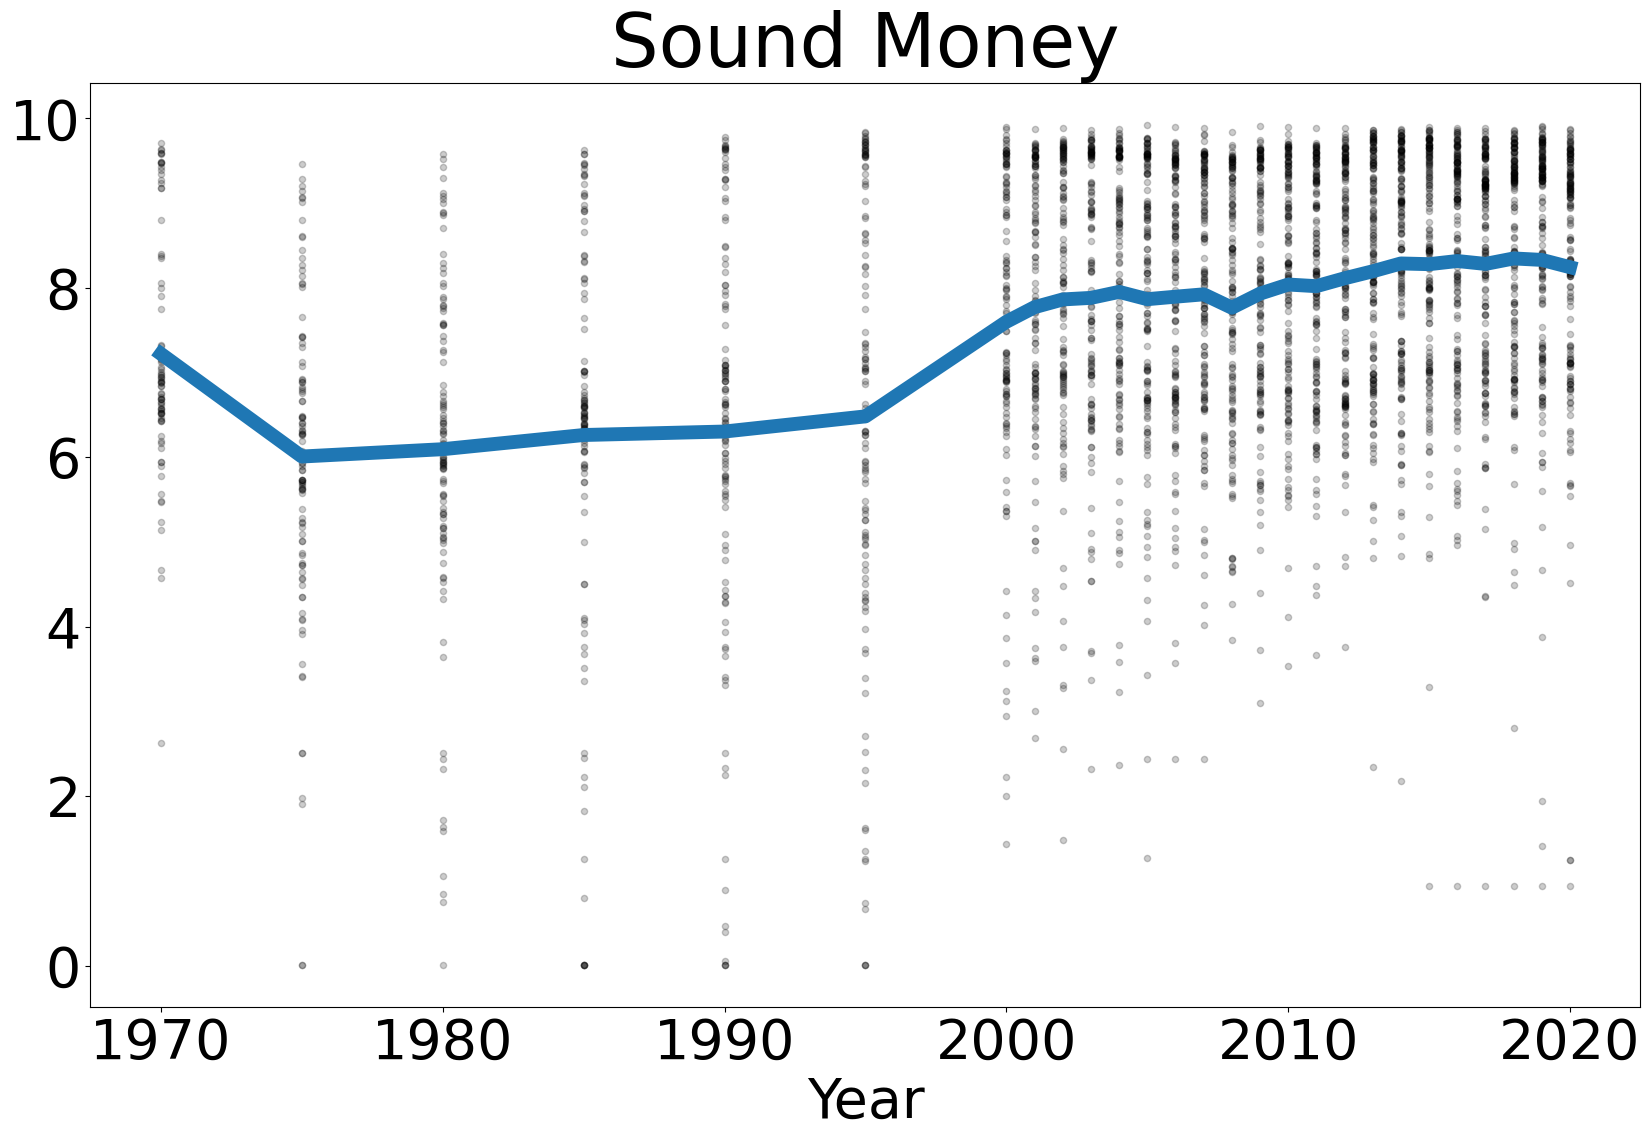

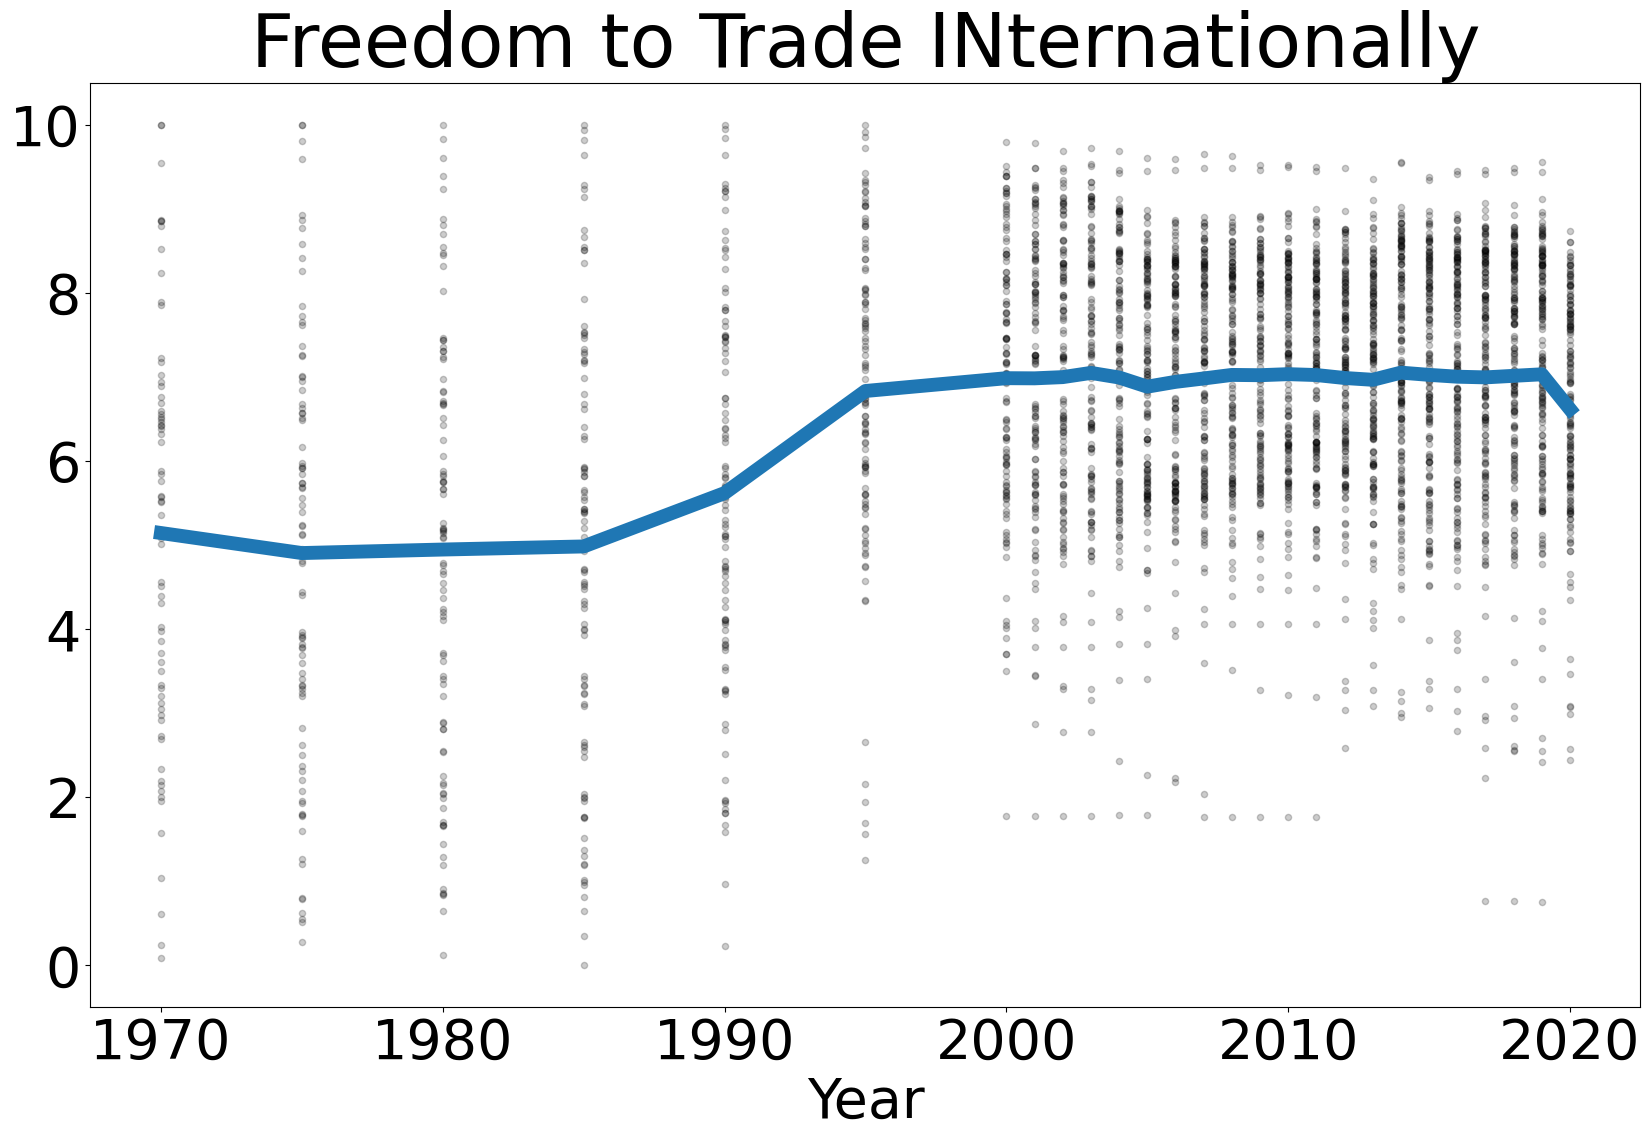

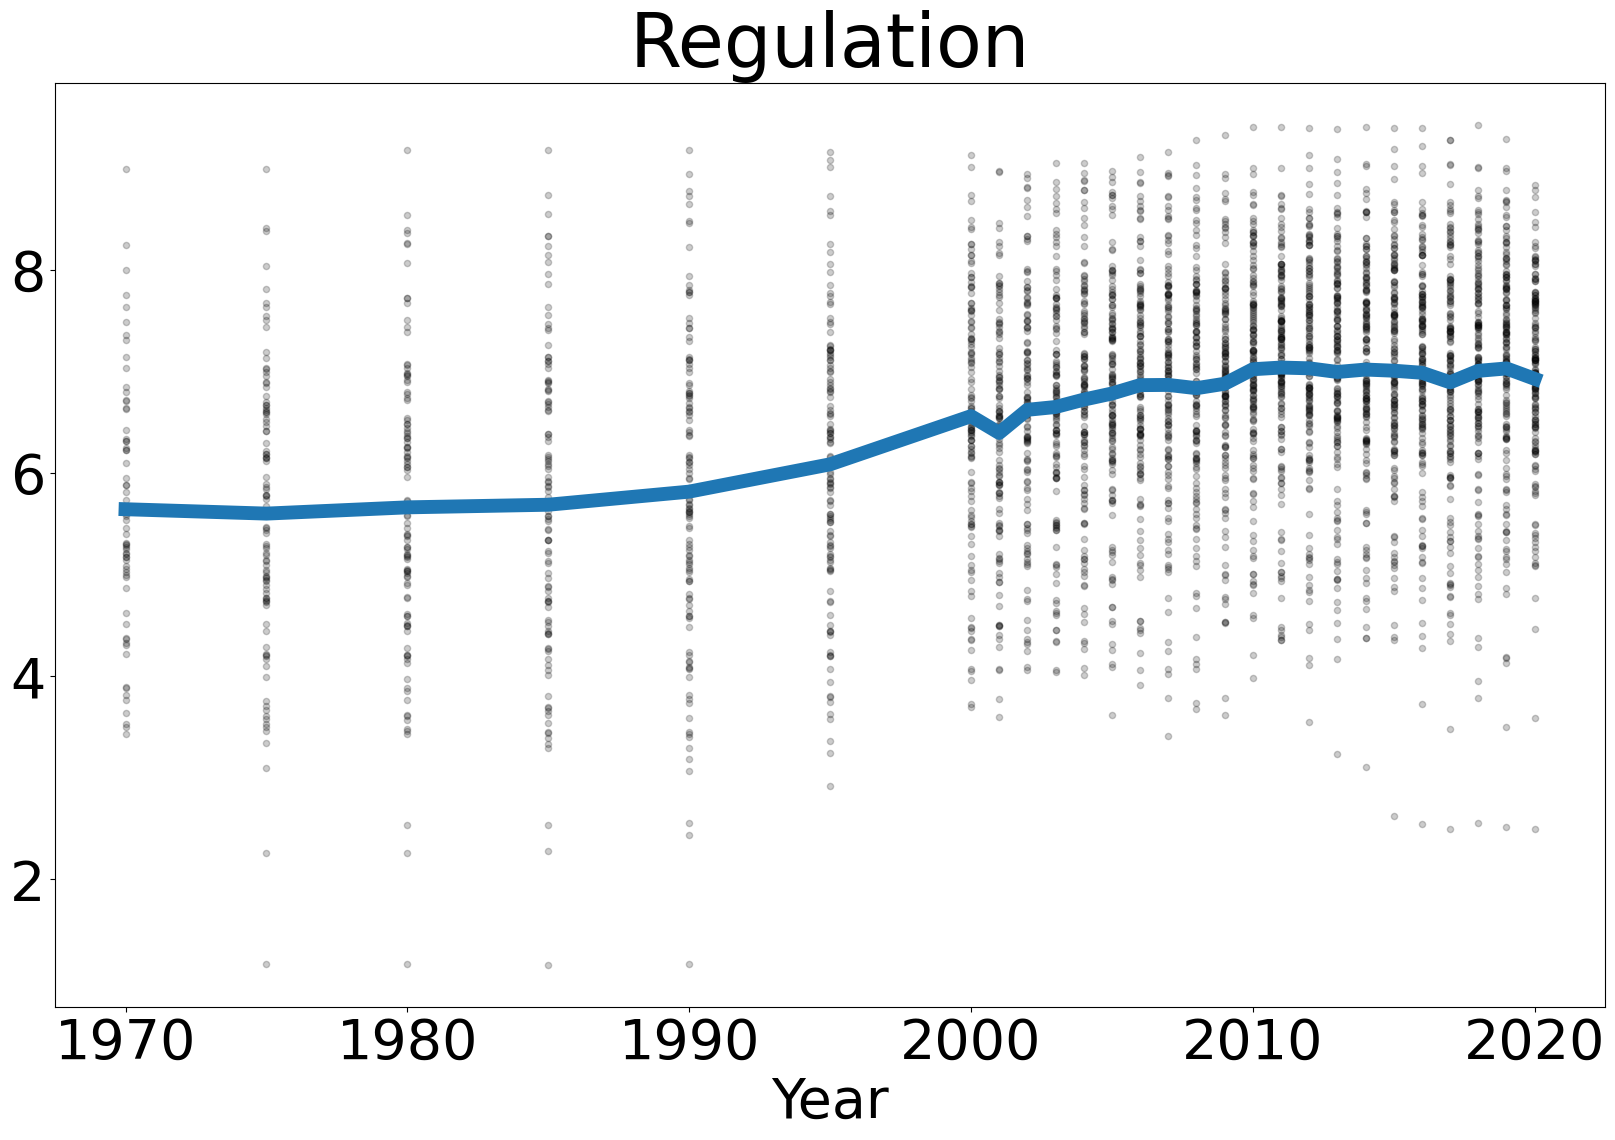

In [52]:
plt.rcParams.update({'font.size': 40})
    
def plot_ts_scatter(data, pp = None):
    time = data.index.get_level_values("Year")
    for key, val in data.items():
        fig, ax = plt.subplots(figsize = (20,12))
        ax.scatter(time, val, alpha = .2, color = "k", s =20)
        # adds title to each chart
        ax.set_title(key, fontsize = 54)
        # creates the mean line
        mean_data[key].plot(ax = ax, linewidth = 10, color ="C0")
        plt.show()
        # automatically saves the file as a .jpeg
        plt.savefig(folder + "/" + key + ".jpeg") 
        if pp != None:
            pp.savefig(fig, bbox_inches ="tight")
        plt.close()
plot_ts_scatter(data)        

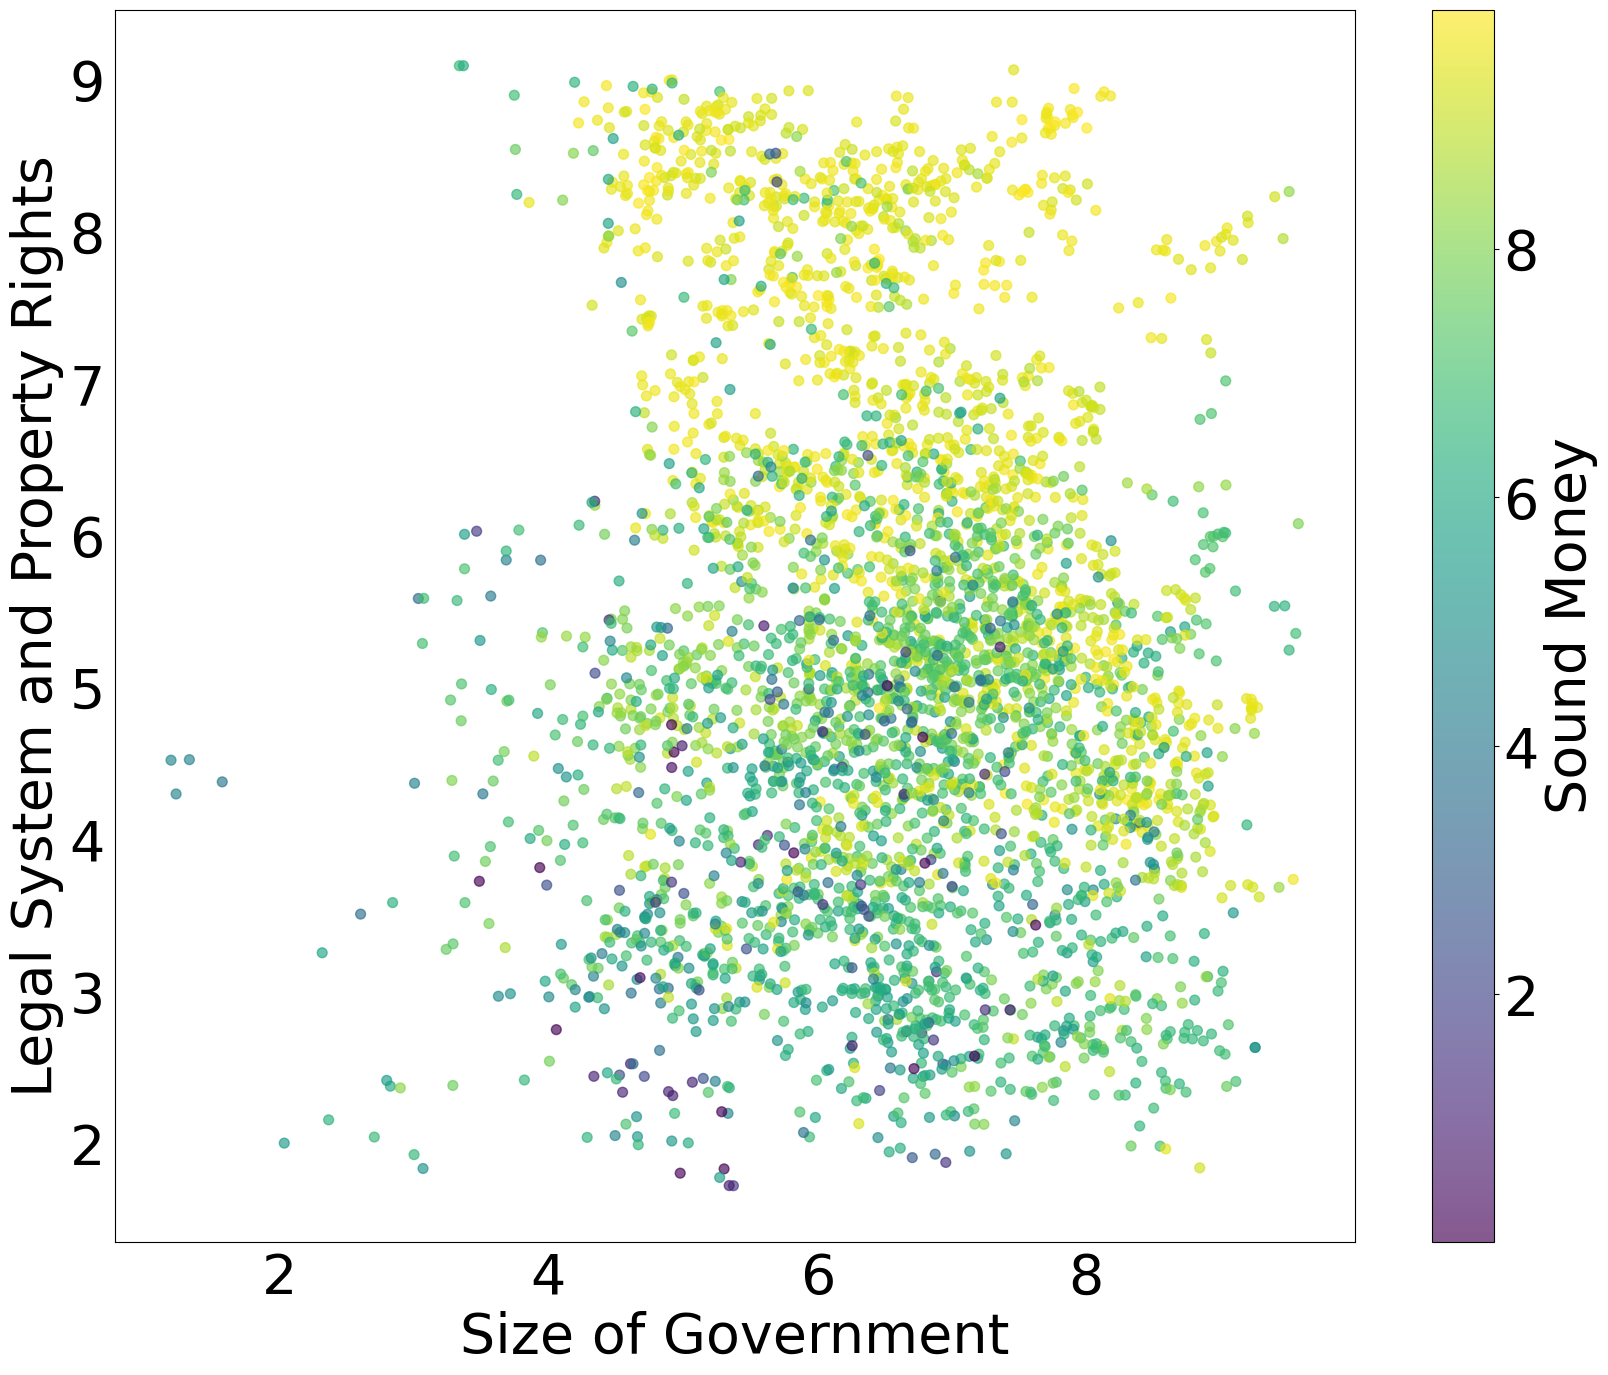

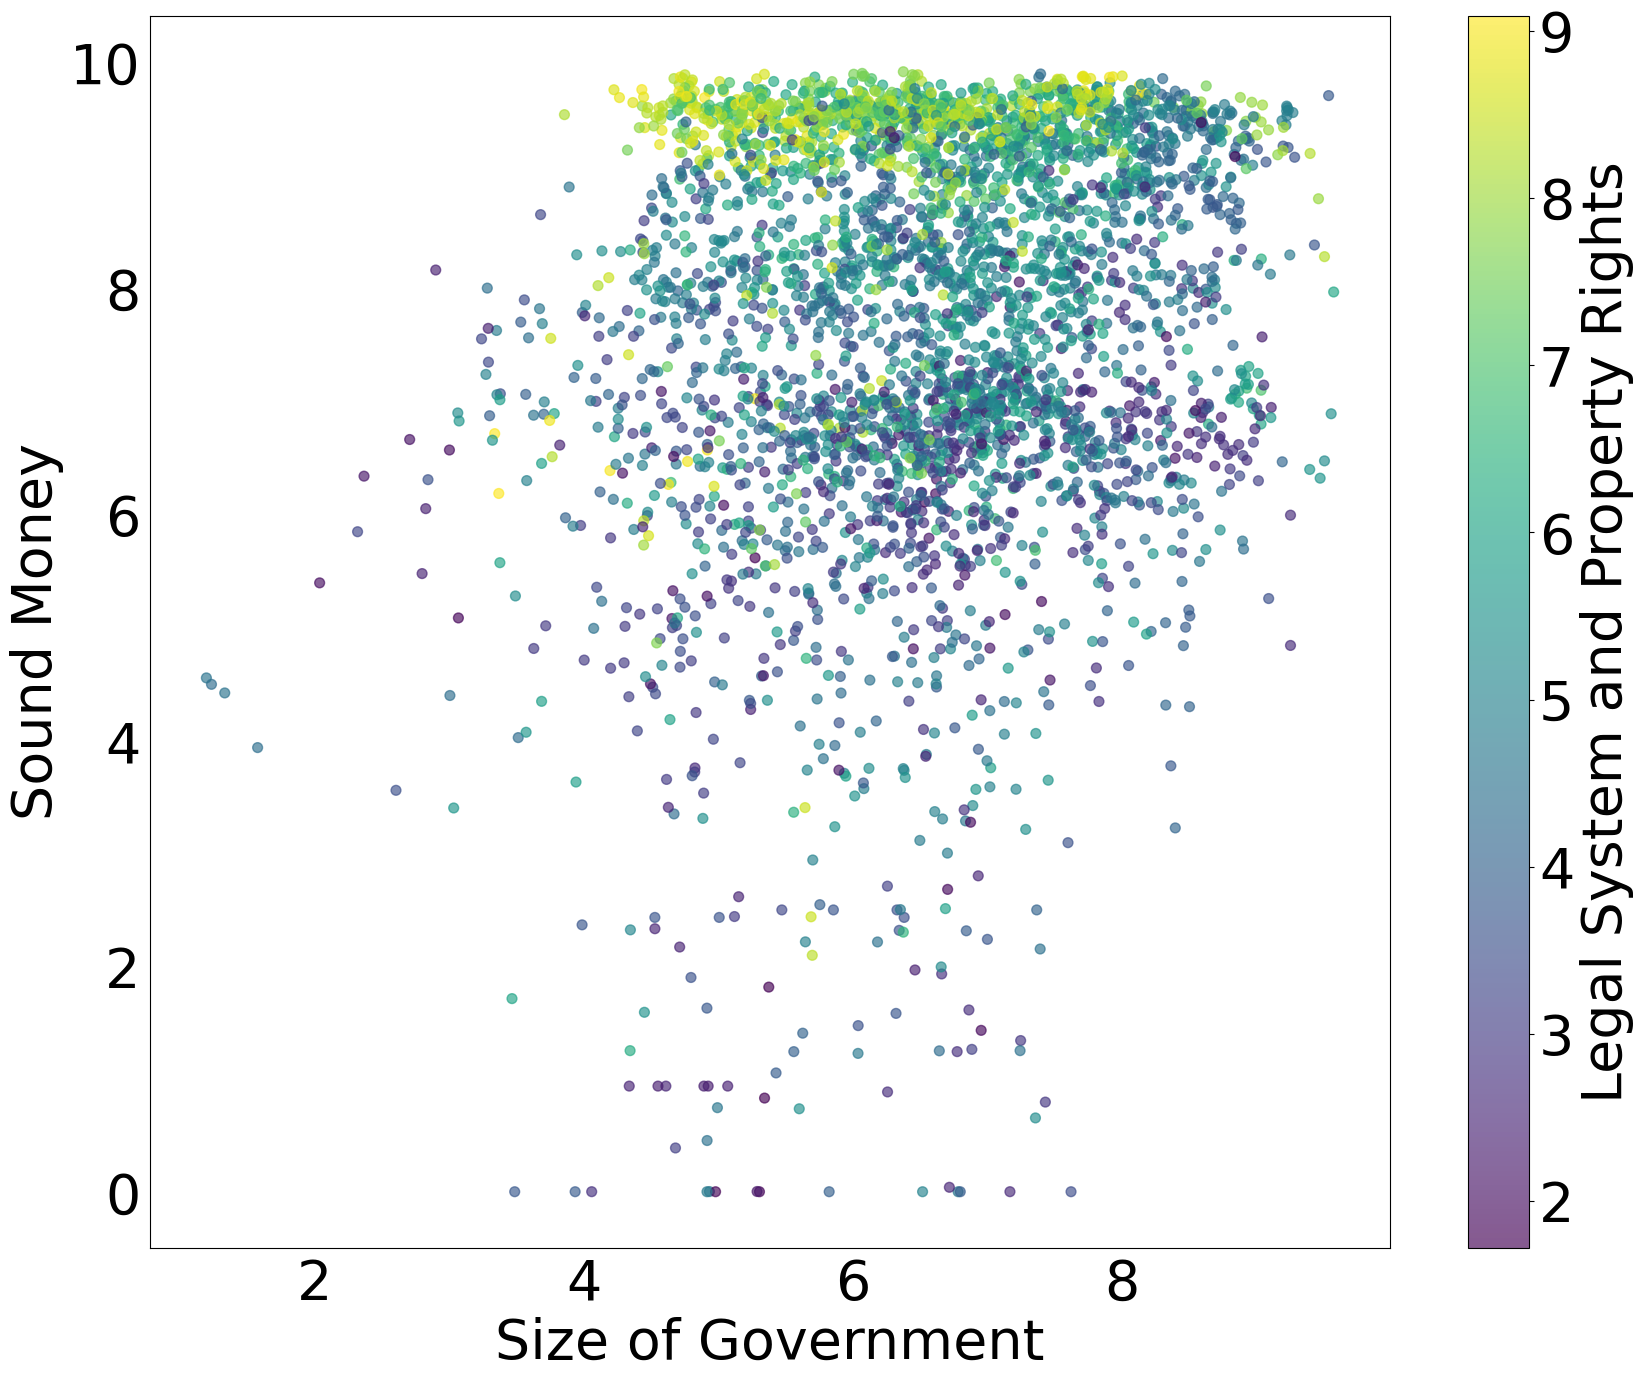

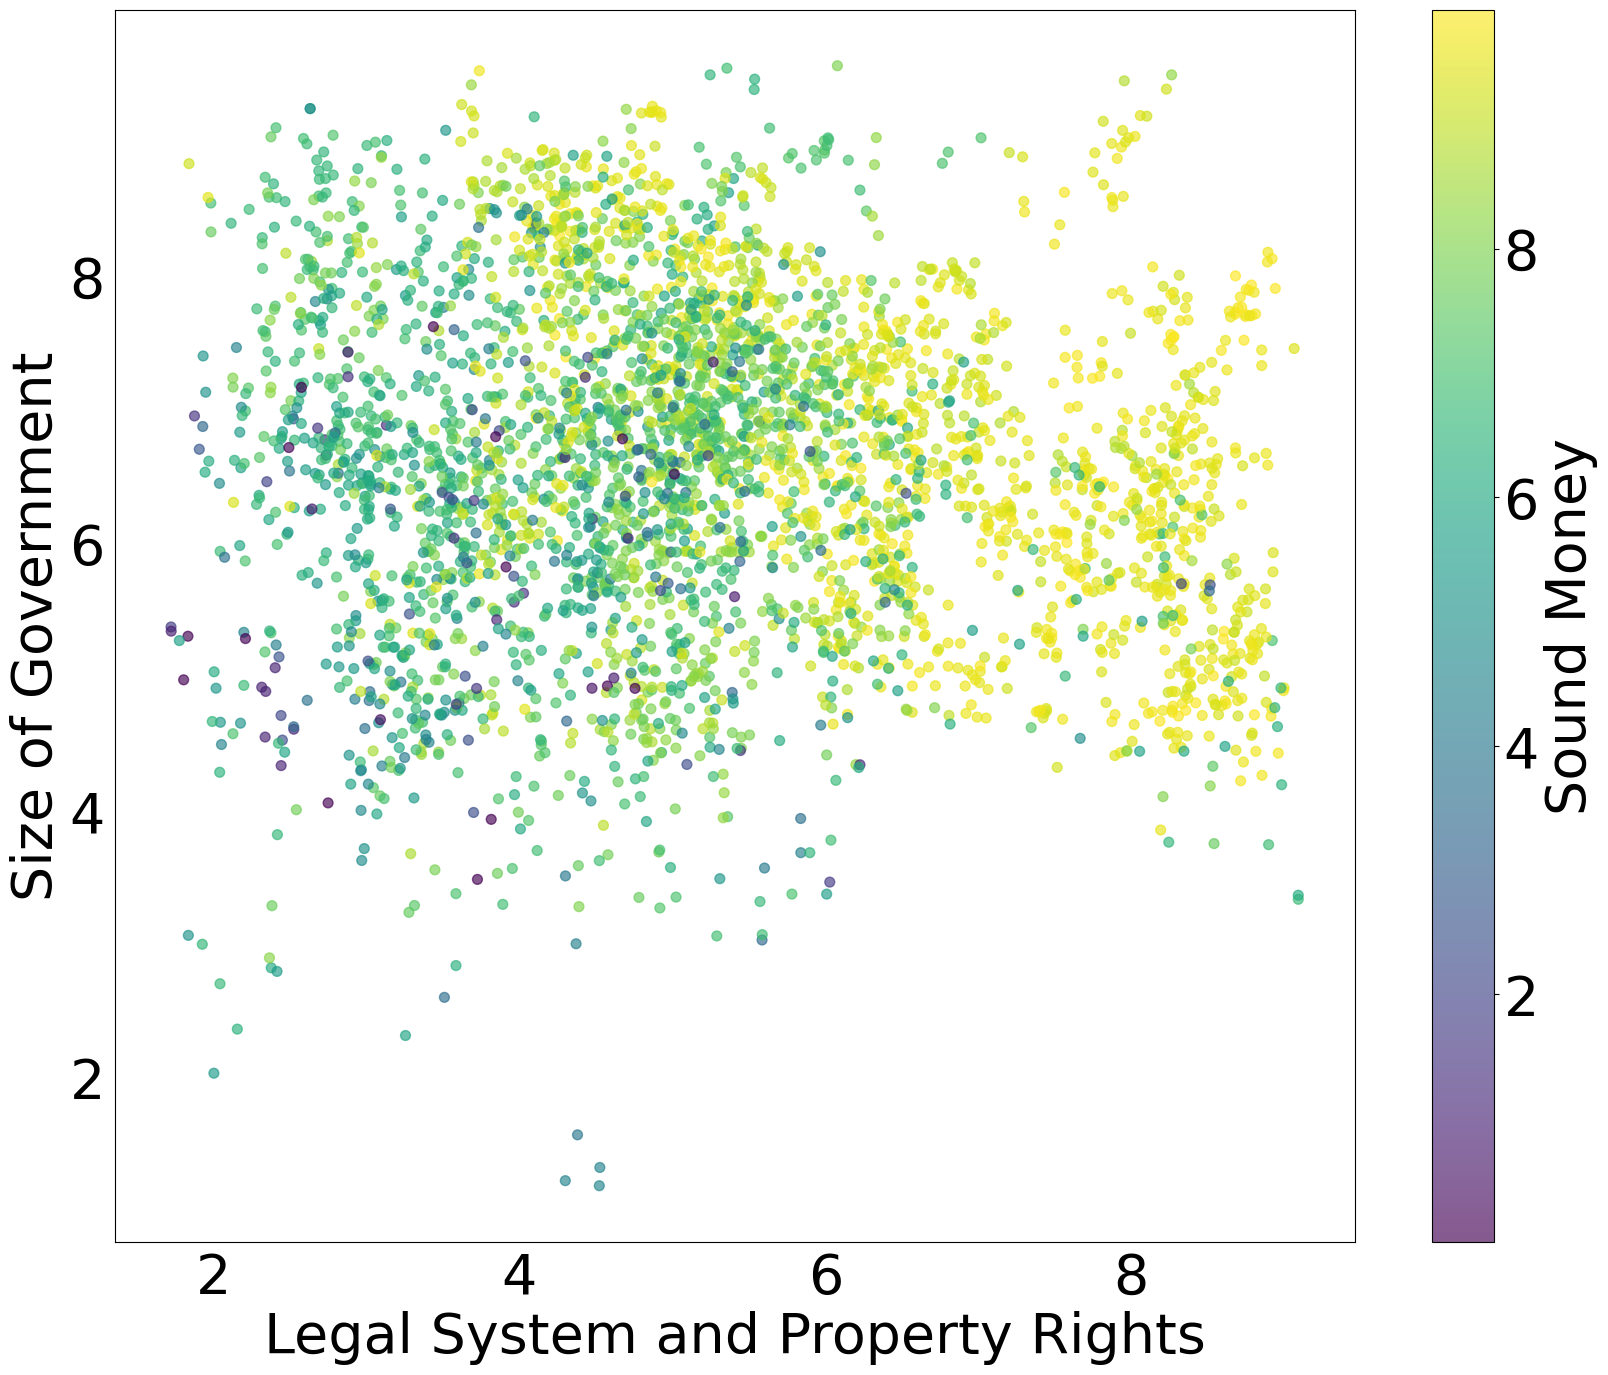

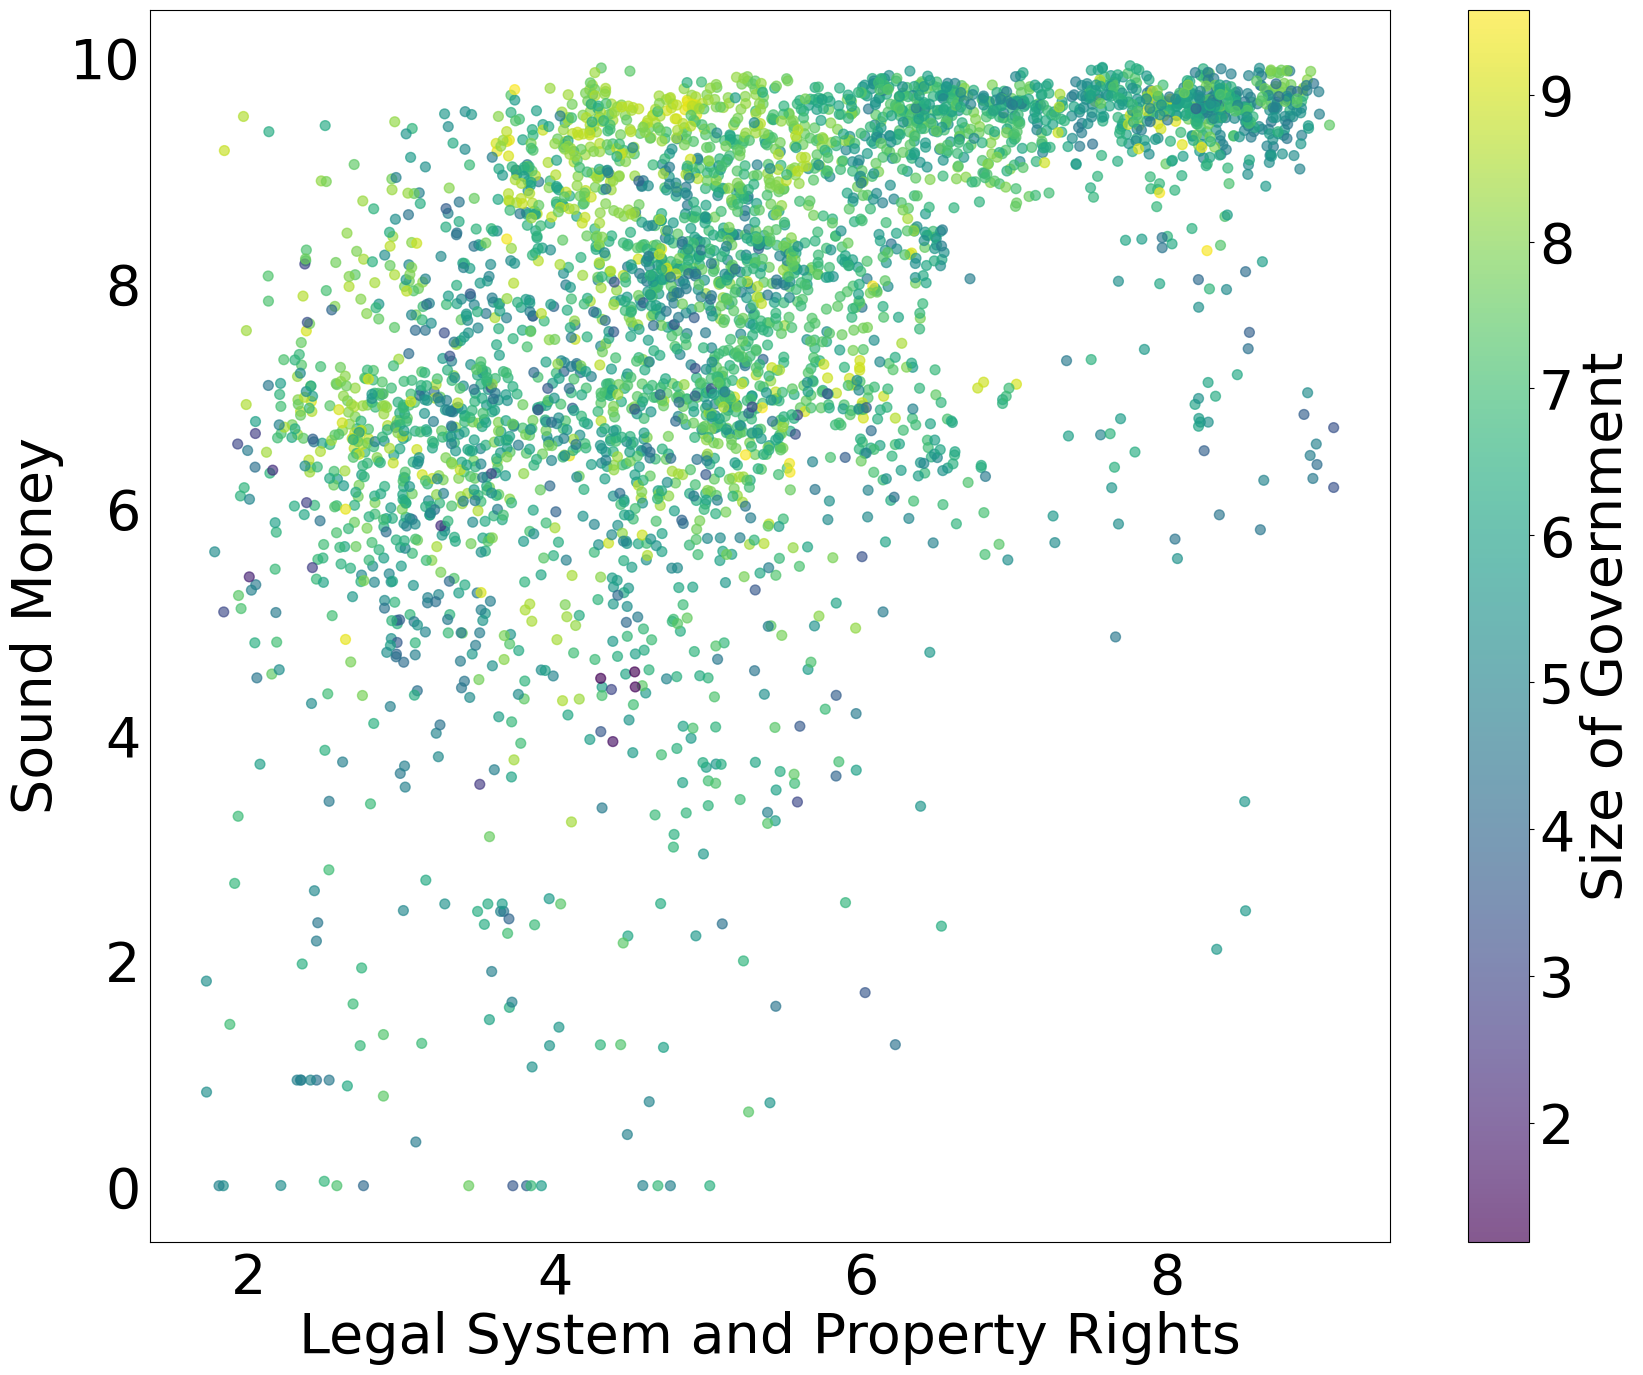

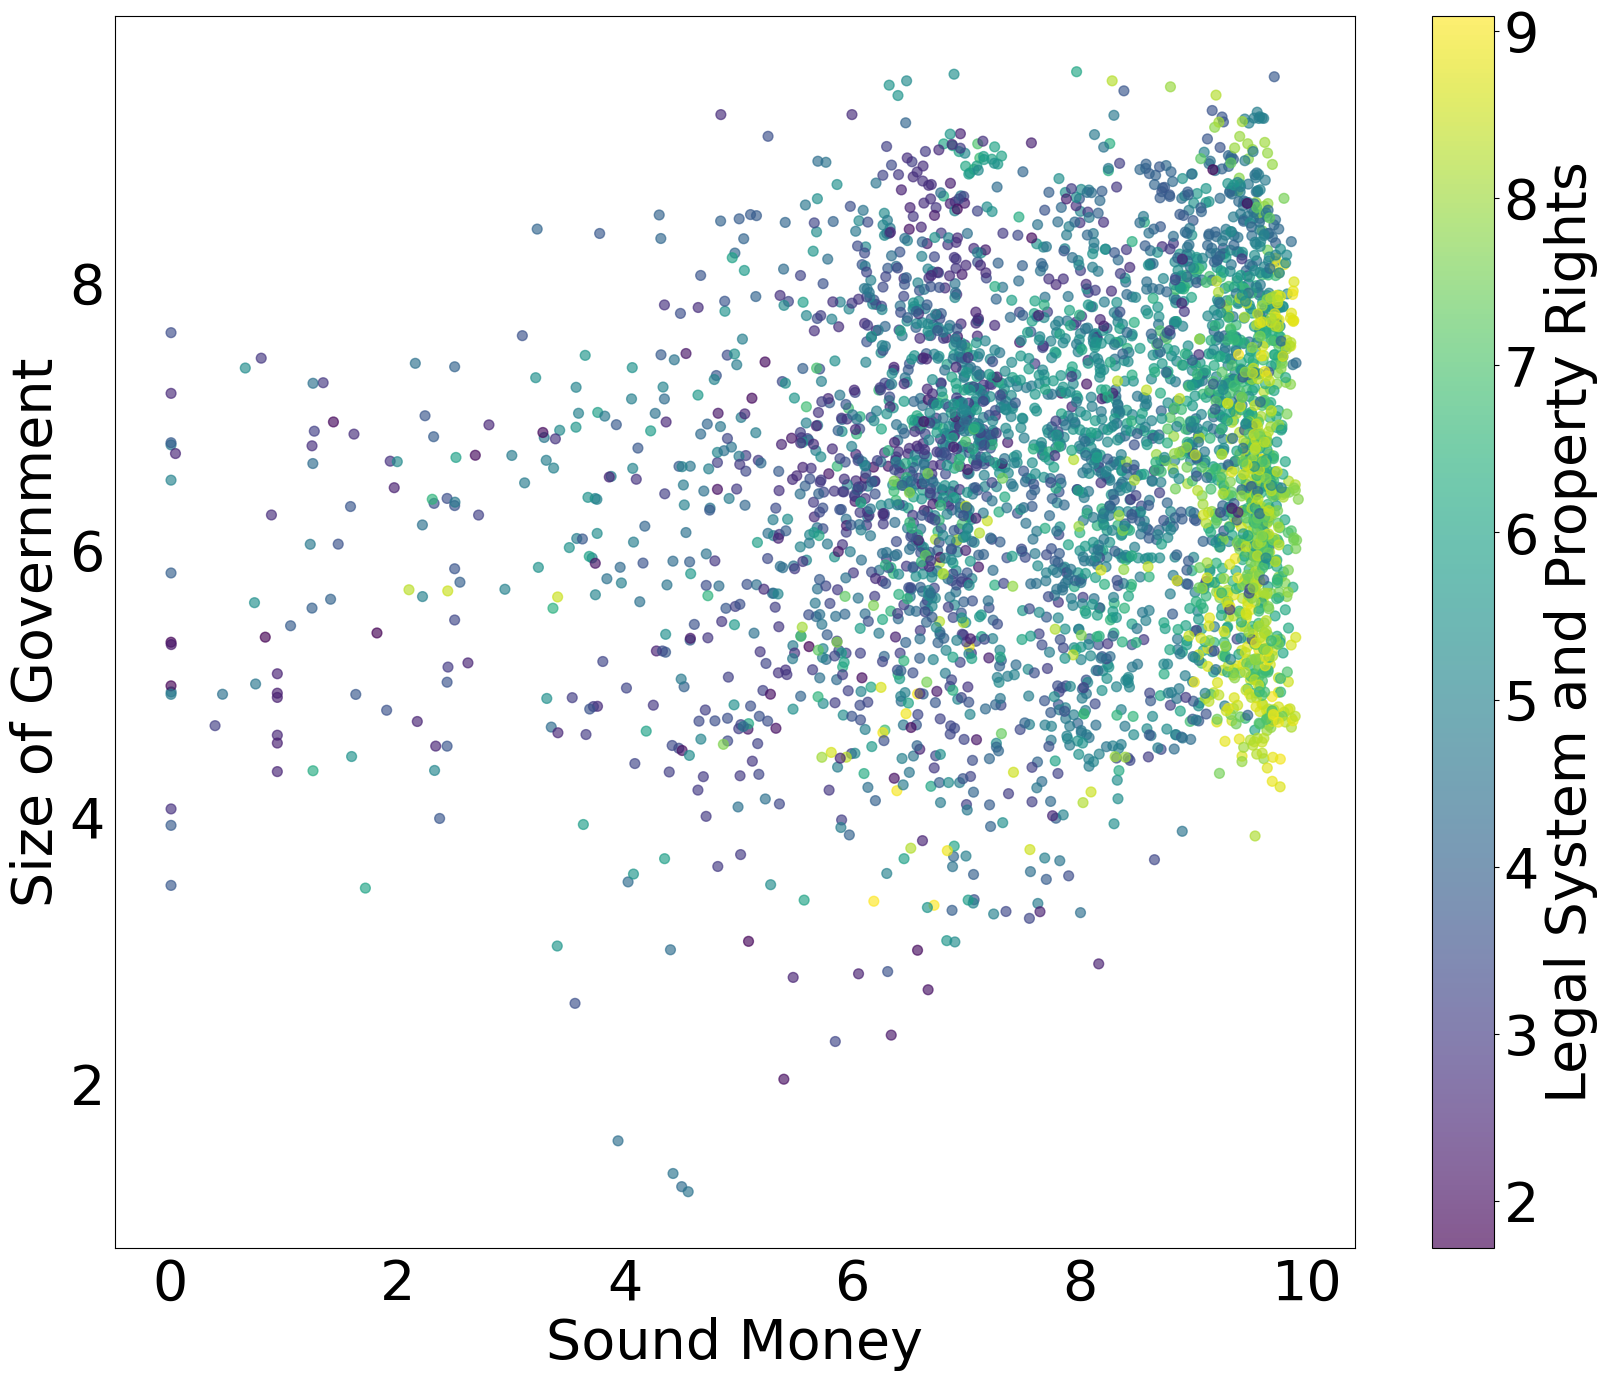

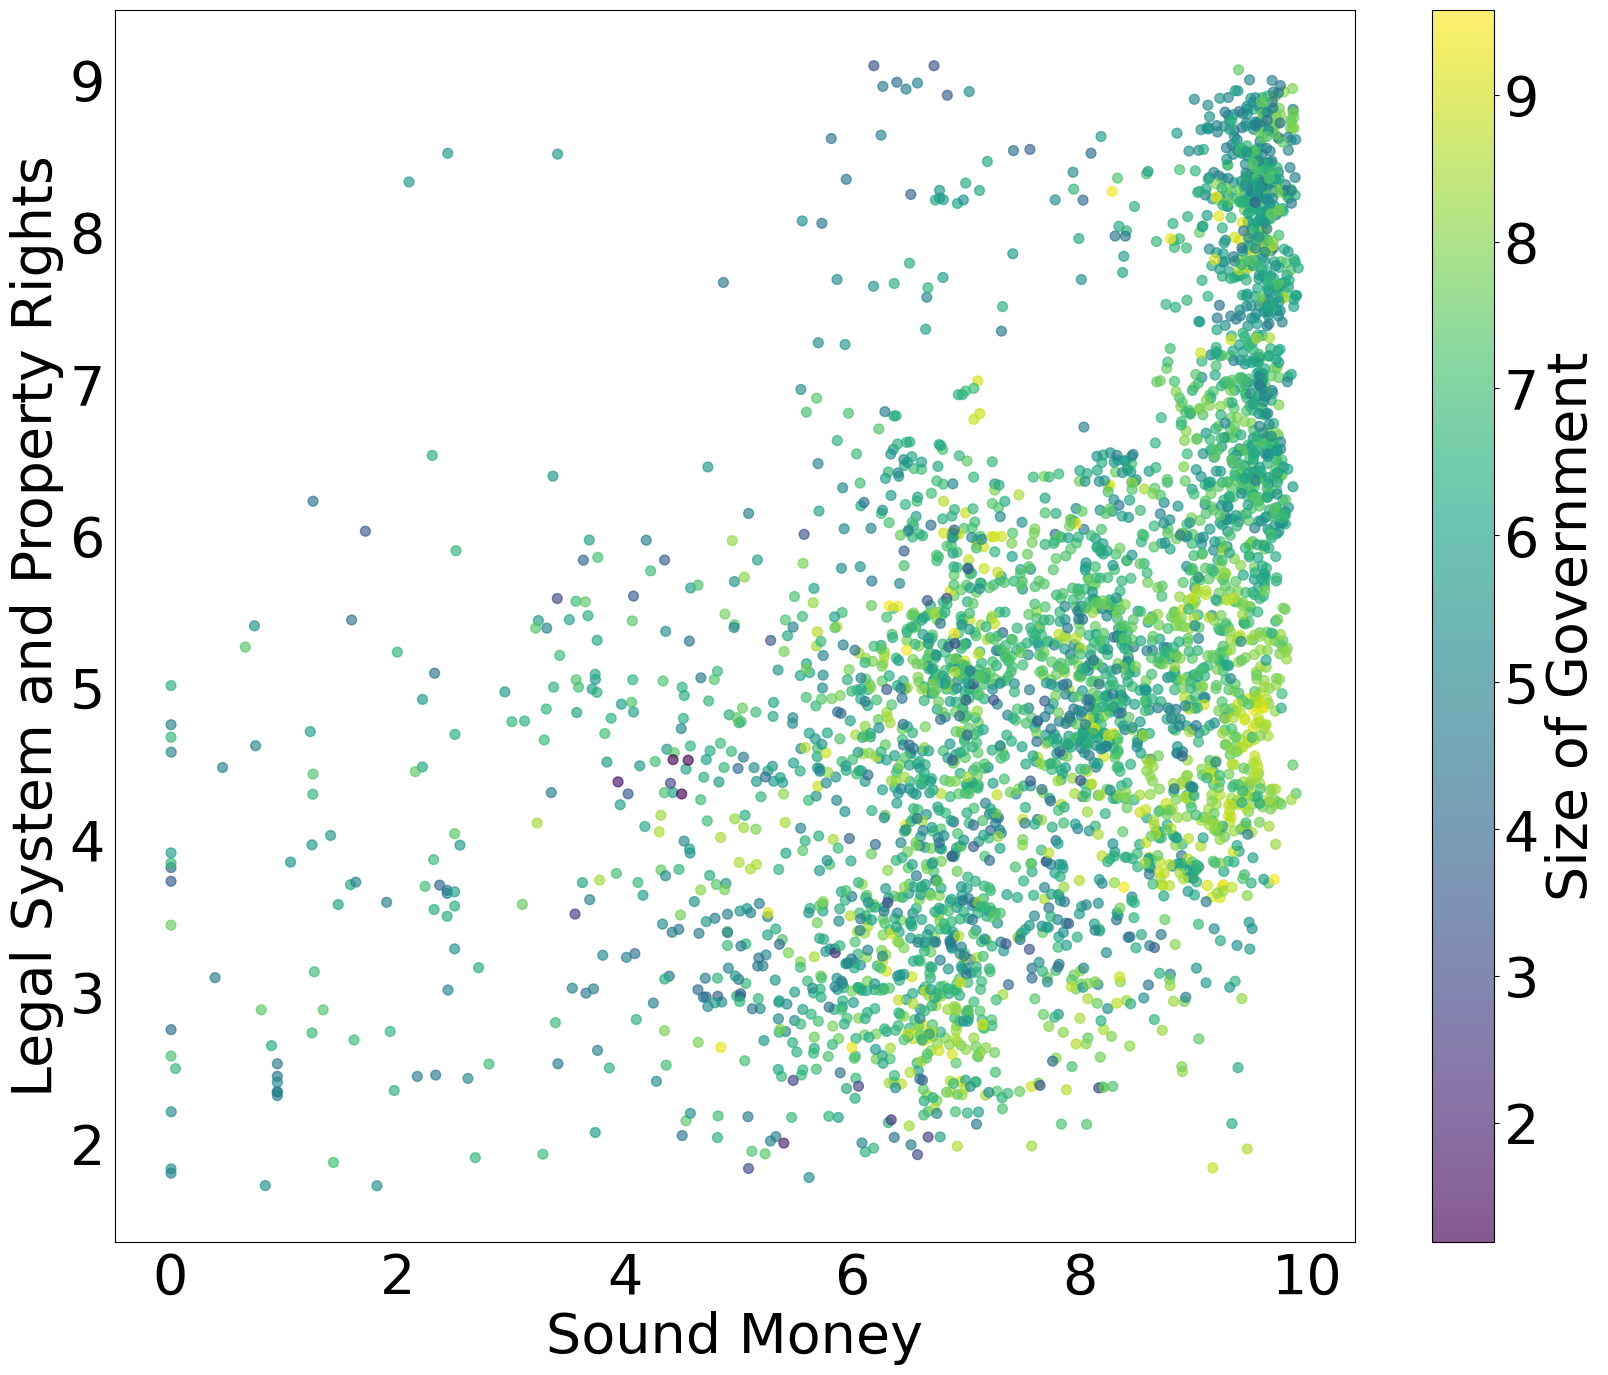

In [56]:
from matplotlib.backends.backend_pdf import PdfPages

# create a pdf
pp = PdfPages(folder + "/Econcomic Freedom Plots.pdf")

def color_dim_scatter(data, pp):
    for key1 in data:
        for key2 in data:
            # don't plot the same variable on x and y
            if key1 != key2:
                for key3 in data:
                    # don't plot the same variable for c, x, and y
                    if key1 != key3 and key2 != key3:
                        fig, ax = plt.subplots(figsize = (20,16))
                        data.plot.scatter(x = key1, 
                                          y = key2, 
                                          c = key3,
                                          colormap = "viridis",
                                          s = 50,
                                          alpha = .65, 
                                          ax = ax)
                        # remove the ticklines
                        plt.setp(ax.get_xticklines(), visible = False)
                        plt.setp(ax.get_yticklines(), visible = False)
                        # show figure
                        plt.show()
                        # save the figure we showed
                        pp.savefig(fig, bbox_inches = "tight")
                        # close the figure
                        plt.close()
                    
color_dim_scatter(data[["Size of Government", "Legal System and Property Rights", "Sound Money"]], pp)
# close the pdf file so that it can opened
pp.close()

In [54]:
folder

'Project 5 Plots'

In [ ]:
def formatted_scatter_matrix(data, pp = None, dim = 15):
    figsize = (dim, dim)
    num_vars = len(data.keys())
    fontsize = 90 / num_vars
    fig, ax = plt.subplots(figsize = figsize)
    # change font size of variables
    plt.rcParams.update({'font.size': fontsize})
    
    pd.plotting.scatter_matrix(data,
                               alpha = .05,
                               # s refers to size of graph
                               s = 300 / num_vars,
                               ax = ax)
    # separate each plot with some margin
    plt.tight_layout()
    plt.show()
    if pp != None:
        # bbox_inches helps not cut off some of the figure
        pp.savefig(fig, bbox_inches = "tight")
    plt.close()
    

plot_data = data.rename(
    # replacing the spaces in the variable titles with a new line "\n"
    columns = {key:key.replace(" ", "\n") for key in data.keys()})
formatted_scatter_matrix(plot_data, pp, dim = 15)

#close pdf so it can be opened without corrupting
pp.close()

### Exercises
1. Create a list of random numbers between 0 and 100 whose length is 1000. (Hint: import random; search "python random" to learn more about the library.)

2. Use the variance function from the textbook to find the variance of this list. Assume that the list represent a population in whole. 

3. Create a 9 more lists of the same length whose elements are random numbers between 0 and 100. Use a nested dictionary to house and identify these lists. Keys for the first layer should be the numbers 1 through 10. Lists should be stored using a second key as follows: dict_name[index]["list"]. Index represents the particular integer key between 1 and 10 as noted above.

4. Find the variance of each list and store it as follows: dict_name[index]["variance"].

5. At the end of chapter 2, we used for loops to find min and max values. Create a min() function and max() function and pass the values from the list in question 1 to each of these to determine the min and max values in that list.

6. Explain why it might be advantageous to create a function instead of building all commands from scratch as you create a script.